# Data Analysis on Titanic Dataset

## About the Dataset

The sinking of the RMS Titanic remains notable as one of the most infamous maritime calamities in recorded history. On April 15, 1912, during its inaugural journey, the Titanic, regarded as impervious to sinking, tragically succumbed to disaster upon colliding with an iceberg. Unfortunately, the vessel lacked an adequate number of lifeboats to accommodate all passengers and crew, leading to the loss of 1502 lives out of the 2224 individuals on board.

Although chance played a pivotal role in determining survival outcomes, discernible patterns emerged regarding the likelihood of survival among various demographic groups.

The primary objectives of this project entail the development of a predictive model aimed at forecasting the likelihood of survival for individual passengers aboard the RMS Titanic. Additionally, the project seeks to identify demographic characteristics associated with a higher probability of survival.

Model assessment will be conducted utilizing the test accuracy metric, where the objective is to maximize the accuracy of the model predictions.

## Description of the Attributes
The Titanic dataset contains information about passengers aboard the RMS Titanic, including whether they survived or not. Here's a description of the attributes:

1. **PassengerId**: A unique identifier for each passenger.
2. **Survived**: Indicates whether the passenger survived or not (0 = No, 1 = Yes). This is our target variable.
3. **Pclass**: Ticket class, which represents the socio-economic status of the passenger (1 = Upper, 2 = Middle, 3 = Lower).
4. **Name**: Name of the passenger.
5. **Sex**: Gender of the passenger.
6. **Age**: Age of the passenger in years. (Some entries might be in decimals to represent infants).
7. **SibSp**: Number of siblings or spouses aboard the Titanic.
8. **Parch**: Number of parents or children aboard the Titanic.
9. **Ticket**: Ticket number.
10. **Fare**: Passenger fare (ticket price).
11. **Cabin**: Cabin number.
12. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

These attributes provide various details about each passenger, such as demographics (e.g., age, sex), socio-economic status (e.g., ticket class, fare), and familial relationships (e.g., number of siblings/spouses, number of parents/children). The 'Survived' attribute is the target variable, indicating whether a passenger survived the Titanic disaster or not.

## Importing Necessary Packages

In [247]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split


## Loading the Dataset

In [248]:
#Loading both the test dataset and the train dataset(uploaded in the zip file along with the project)
from google.colab import files
upload=files.upload()

Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


### Exploring Training Data

In [249]:
# Read the csv file into train_data dataframe
train_data = pd.read_csv("train.csv")

# Check first five rows of train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
# Get an overview of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The train_data dataframe has 891 rows and 12 columns. Of the 12 columns, 7 are numerical, and 5 are non-numerical.

We can see the number of missing values in the ‘Age’ column, ‘Cabin’ and ‘Embarked’ column; later, we would do some imputations to handle them.

In [251]:
# Get summary statistics of the numerical columns of train_data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This table provides descriptive statistics for numerical attributes of the Titanic dataset.

1. **PassengerId**: This is the unique identifier for each passenger. The count is 891, indicating that there are 891 passengers in the dataset. The minimum value is 1, and the maximum value is 891, which aligns with the count. The mean and median (50th percentile) are around 446, indicating relatively even distribution.

2. **Survived**: This binary variable indicates whether a passenger survived or not. The mean survival rate is approximately 0.38, indicating that about 38% of passengers survived. Since it's binary, other statistical measures are not applicable.

3. **Pclass**: This variable represents the ticket class, with values 1, 2, and 3 representing Upper, Middle, and Lower classes, respectively. The mean is approximately 2.31, indicating that the average ticket class is between Middle and Lower. The majority of passengers might have belonged to the Lower class, as suggested by the lower quartile (25th percentile) being closer to 2 and the upper quartile (75th percentile) being closer to 3.

4. **Age**: The mean age is around 29.7 years, with a standard deviation of approximately 14.5 years, indicating some variability in ages. The minimum age is 0.42 years, likely representing infants, and the maximum age is 80 years. The distribution seems somewhat right-skewed, as the median (50th percentile) is less than the mean.

5. **SibSp**: This attribute represents the number of siblings or spouses aboard the Titanic. The mean is approximately 0.52, indicating that, on average, passengers had less than one sibling or spouse aboard. The maximum value is 8, suggesting that some passengers traveled with larger families.

6. **Parch**: Similar to SibSp, Parch represents the number of parents or children aboard the Titanic. The mean is approximately 0.38, indicating that, on average, passengers had less than one parent or child aboard. The maximum value is 6, suggesting some passengers were traveling with larger families.

7. **Fare**: This attribute represents the passenger fare. The mean fare is approximately 32.20, with a standard deviation of approximately 49.69, indicating significant variability in fares. The minimum fare is 0, which seems unusual, and the maximum fare is 512.33, suggesting a wide range of ticket prices. The distribution appears highly right-skewed, as the median (50th percentile) is much lower than the mean, and there are likely some outliers contributing to the high maximum value.

In [252]:
# Get summary statistics of the object columns of train_data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


This table provides descriptive statistics for categorical attributes of the Titanic dataset. Here's the analysis:

1. **Name**: This attribute represents the names of the passengers. There are 891 unique names, indicating that each passenger has a distinct name. The top name, appearing once, is "Braund, Mr. Owen Harris", and it is the most frequent name, appearing once.

2. **Sex**: This attribute represents the gender of the passengers. There are two unique values: "male" and "female". Among the 891 passengers, 577 are male, and 314 are female. The top value is "male", with a frequency of 577.

3. **Ticket**: This attribute represents the ticket numbers of the passengers. There are 681 unique ticket numbers out of 891 passengers. The top ticket number is "347082", which appears seven times, making it the most frequent ticket number.

4. **Cabin**: This attribute represents the cabin numbers of the passengers. There are 204 unique cabin numbers out of 891 passengers. The top cabin number is "B96 B98", which appears four times, making it the most frequent cabin number.

5. **Embarked**: This attribute represents the port of embarkation for the passengers. There are three unique values: "S" (Southampton), "C" (Cherbourg), and "Q" (Queenstown). Among the 891 passengers, 644 embarked from Southampton, making it the most frequent port of embarkation. There are 2 missing values in this attribute, as indicated by the count being 889 instead of 891.

In [253]:
# Check number of unique values in each column of train_data
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

This code checks the number of unique values in each column of the `train_data` DataFrame.

- **PassengerId**: There are 891 unique passenger IDs, indicating that each passenger has a distinct ID.
- **Survived**: This attribute represents whether a passenger survived or not. There are 2 unique values: 0 (did not survive) and 1 (survived).
- **Pclass**: This attribute represents the passenger class. There are 3 unique values: 1, 2, and 3, indicating the first, second, and third class, respectively.
- **Name**: There are 891 unique names, suggesting that each passenger has a distinct name.
- **Sex**: This attribute represents the gender of the passengers. There are 2 unique values: "male" and "female".
- **Age**: There are 88 unique age values, indicating some missing values or a wide range of ages.
- **SibSp**: This attribute represents the number of siblings/spouses aboard the Titanic. There are 7 unique values ranging from 0 to 8.
- **Parch**: This attribute represents the number of parents/children aboard the Titanic. There are 7 unique values ranging from 0 to 6.
- **Ticket**: There are 681 unique ticket numbers, suggesting some passengers might share a ticket number.
- **Fare**: There are 248 unique fare values, indicating different ticket prices paid by passengers.
- **Cabin**: There are 147 unique cabin numbers, suggesting that some passengers might share a cabin.
- **Embarked**: This attribute represents the port of embarkation. There are 3 unique values: "S" (Southampton), "C" (Cherbourg), and "Q" (Queenstown).

In [254]:
# See unique values in select columns of train_data
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_data[col].unique()))

Unique values in Survived: [0 1]
Unique values in Pclass: [3 1 2]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Parch: [0 1 2 5 3 4 6]
Unique values in Embarked: ['S' 'C' 'Q' nan]


This code snippet prints the unique values in select columns of the `train_data` DataFrame.

- **Survived**: The unique values in this column are 0 and 1, indicating whether a passenger did not survive (0) or survived (1).
- **Pclass**: This column contains the unique values 3, 1, and 2, representing the passenger classes, with 3 being the most common class.
- **Sex**: There are two unique values in this column: 'male' and 'female', representing the gender of the passengers.
- **SibSp**: The unique values in this column are 0, 1, 3, 4, 2, 5, and 8, representing the number of siblings/spouses aboard the Titanic.
- **Parch**: This column contains the unique values 0, 1, 2, 5, 3, 4, and 6, representing the number of parents/children aboard the Titanic.
- **Embarked**: The unique values in this column are 'S', 'C', 'Q', and 'nan', representing the ports of embarkation: Southampton, Cherbourg, Queenstown, and missing values (nan) respectively.

Let us understand visually how the different features are related to the target feature.

### Number of Passengers who Survived

<Axes: xlabel='Survived', ylabel='count'>

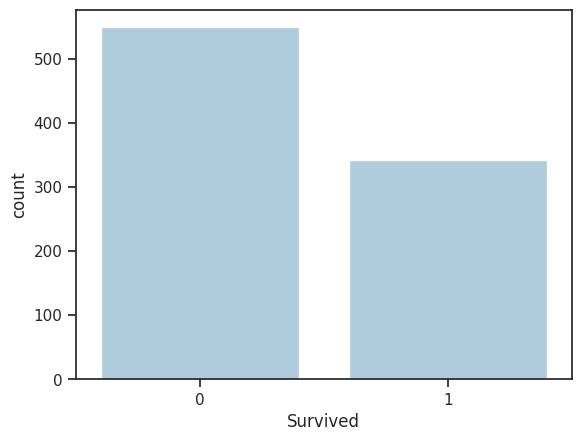

In [255]:
sns.countplot(x = 'Survived', data = train_data)

This bar plot illustrates the distribution of passengers based on their survival status. Here's the analysis:

- **Survival Distribution**:
  - The majority of passengers did not survive the Titanic disaster, as indicated by the tall bar on the left side of the plot.
  - Conversely, the number of passengers who survived, shown by the shorter bar on the right side, is notably smaller compared to those who did not survive.

**Interpretation**:
- The plot reflects the tragic outcome of the Titanic disaster, where a significant portion of passengers lost their lives.
- Understanding the survival distribution is crucial for analyzing factors that might have influenced survival rates, such as passenger class, age, gender, and whether they were traveling alone or with family.
- Further analysis involving these variables can provide insights into the factors contributing to survival and help in understanding the demographics of survivors.

We observe that the survival rate was less and the number of passengers who could not survive was greater than those who survived.

### Number of passengers who survived based on Passenger Class

<Axes: xlabel='Survived', ylabel='count'>

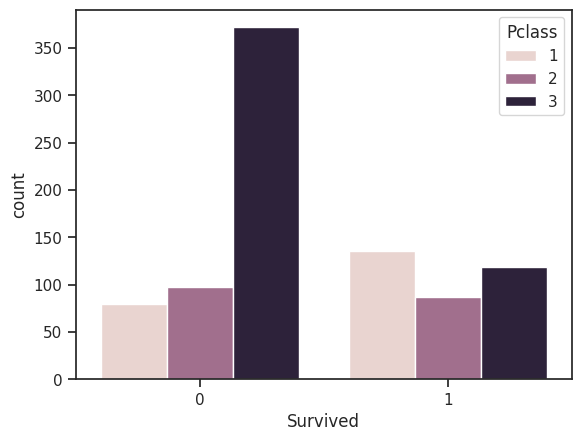

In [256]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

This grouped bar plot illustrates the count of passengers who survived and those who did not, categorized by passenger class (Pclass). Here's the analysis:

- **Survival Count by Passenger Class**:
  - Passengers in the first class (Pclass 1) have the highest count of survivors, followed by passengers in the third class (Pclass 3).
  - Among passengers who did not survive, those in the third class (Pclass 3) constitute the majority, followed by passengers in the second class (Pclass 2).
  
**Interpretation**:
- The plot indicates that a higher proportion of first-class passengers survived compared to passengers in the lower classes.
- Conversely, a larger number of third-class passengers did not survive the disaster, indicating potential discrepancies in survival rates based on passenger class.
- The plot underscores the historical reality that access to lifeboats and other resources during the Titanic disaster may have been influenced by socioeconomic status, reflected in the differentiation of survival rates among passenger classes.

Let us further look at the age of the passengers in each class.



<Axes: xlabel='Pclass', ylabel='Age'>

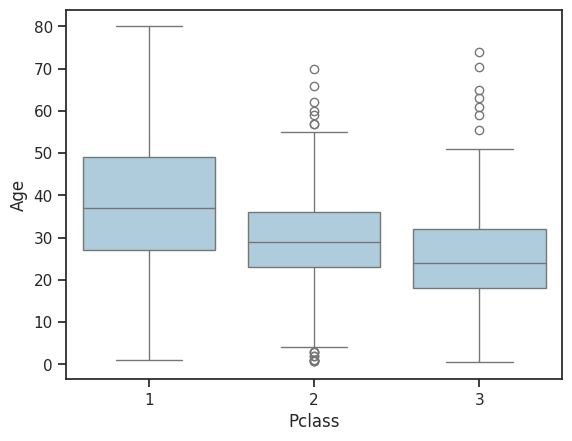

In [257]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train_data)

This box plot displays the distribution of ages among passengers grouped by passenger class (Pclass). Here's the analysis:

- **Age Distribution by Passenger Class**:
  - Passengers in the first class (Pclass 1) have a wider range of ages, with a median age around 37 to 40 years.
  - The second class (Pclass 2) also shows a considerable spread of ages, with a median age slightly below that of the first class.
  - In contrast, passengers in the third class (Pclass 3) generally tend to be younger, with a median age around 24 to 28 years.
  
**Interpretation**:
- The box plot suggests that the passenger demographics varied across different classes, with older individuals more prevalent in the higher classes and younger passengers more common in the lower classes.
- This distribution might reflect differences in socioeconomic status and travel purposes among passengers in various classes aboard the Titanic.
- The outliers present in each class indicate the presence of individuals whose ages significantly deviate from the typical age range within their respective classes.

There are many outliers in this case which will be dealt with later since we will be doing feature engineering and making a new feature named 'AgeGroup'.

### Number of siblings / spouses aboard the Titanic

<Axes: xlabel='SibSp', ylabel='count'>

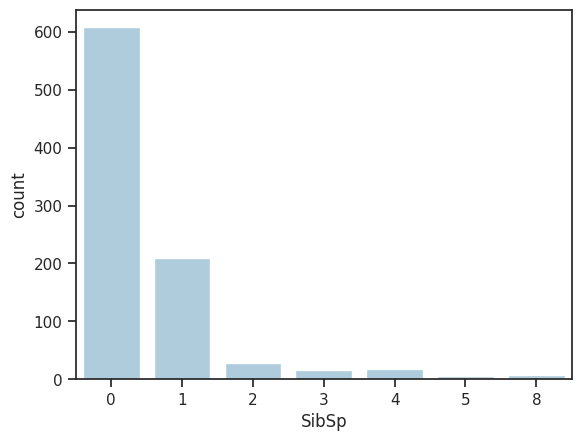

In [258]:
sns.countplot(x = 'SibSp', data = train_data)

This histogram displays the distribution of the number of siblings/spouses (SibSp) each passenger had aboard the Titanic. Here's the analysis:

- **SibSp Distribution**:
  - The majority of passengers traveled alone, as indicated by the tallest bar on the left side of the plot (SibSp = 0).
  - There is a noticeable decline in the frequency as the number of siblings/spouses increases, with very few passengers having more than 2 siblings/spouses.

**Interpretation**:
- The plot highlights that a significant portion of passengers traveled without any siblings or spouses.
- Understanding the distribution of family relations on board is essential for studying the dynamics of group survival and individual decision-making during the Titanic disaster.
- Further analysis can explore how the presence or absence of family members might have influenced survival rates and other aspects of the passengers' experiences.

### Exploring the Test data

In [259]:
# Read the csv file into test_data dataframe
test_data = pd.read_csv("test.csv")

# Check first five rows of train_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [260]:
# Get an overview of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The range of values in each numerical column of test_data makes sense.

In [261]:
# Get summary statistics of the object columns of test_data
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Similar to train_data, the most frequent class in the Sex column of test_data is male, while the most frequent class in the Embarked column of test_data is S for Southampton.

In [262]:
# Check number of unique values in each column of test_data
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

The number of unique values in each of the Pclass, Sex, and Embarked columns of test_data is as expected like the train_data.

In [263]:
# See unique values in select columns of test_data
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_data[col].unique()))

Unique values in Pclass: [3 2 1]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [0 1 2 3 4 5 8]
Unique values in Parch: [0 1 3 2 4 6 5 9]
Unique values in Embarked: ['Q' 'S' 'C']


# Handling the Missing Values

In [264]:
# Determine number of missing values in each column of train_data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This code calculates the number of missing values in each column of the `train_data` DataFrame using the `.isna().sum()` method.

- **PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, and Fare**: These columns have no missing values, as indicated by a count of 0 for each.
- **Age**: There are 177 missing values in the 'Age' column.
- **Cabin**: This column has 687 missing values.
- **Embarked**: There are 2 missing values in the 'Embarked' column.

In [265]:
# Determine number of missing values in each column of test_data
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Similarly, in test_data, the Age column has 86 missing values, the Fare column has 1 missing value, and the Cabin column has 327 missing values.

In [266]:
# Determine percentage of missing values in each column of train_data
train_data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In train_data, 19.86% of values in the Age column are missing, 77.10% of values in the Cabin column are missing, and 0.22% of values in the Embarked column are missing.

In [267]:
# Determine percentage of missing values in each column of test_data
test_data.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In test_data, 20.57% of values in the Age column are missing, 0.24% of values in the Fare column is missing, and 78.23% of values in the Cabin column are missing.

In [268]:
# Determine number of rows with missing values in train_data
train_data.isna().any(axis=1).sum()

708

Of 891 rows in train_data, 708 have at least one missing value.

In [269]:
# Determine number of rows with missing values in test_data
test_data.isna().any(axis=1).sum()

331

Of 418 rows in test_data, 331 have at least one missing value.

In [270]:
# Determine percentage of rows in train_data with missing values
train_data.isna().any(axis=1).mean()

0.7946127946127947

Of 891 rows in train_data, 79.46% have at least one missing value.

In [271]:
# Determine percentage of rows in test_data with missing values
test_data.isna().any(axis=1).mean()

0.7918660287081339

Of 418 rows in test_data, 79.19% have at least one missing value.

### Age

<Axes: xlabel='Age', ylabel='Count'>

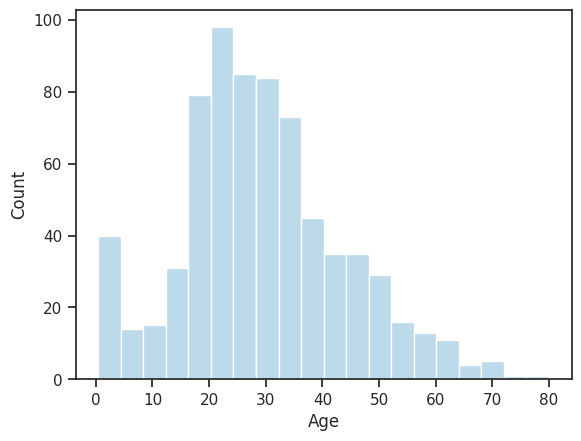

In [272]:
# Create histogram of Age column of train_data
sns.histplot(data=train_data, x='Age')

This histogram illustrates the distribution of ages among passengers. Here's an analysis:

- **Age Distribution**:
  - The histogram shows that the majority of passengers fall within the age range of approximately 20 to 40 years old.
  - There's a noticeable peak around the early 20s, indicating a significant number of young passengers.
  - The distribution gradually decreases as age increases beyond 40, with relatively few passengers in their 60s and 70s, and very few beyond that age.
  
Overall, the age distribution suggests that the Titanic had a diverse range of passengers in terms of age, with a significant proportion being young adults.
The distribution of Age does not look skewed i.e, the distribution of Age looks somewhat like the Normal Distribution.

In [273]:
# Compute skewness of Age column of train_data
print("Skewness of Age: {}".format(skew(train_data['Age'])))

Skewness of Age: nan


This confirms that the distribution of Age is negligibly skewed. Thus, we can replace the NaN values in Age, with the mean with majorly affecting the model to be trained.

In [274]:
# Compute the mean of the Age column of train_data
age_mean = train_data['Age'].mean()

# Fill missing Age values in train_data and test_data with age_mean
train_data['Age'] = train_data['Age'].fillna(age_mean)
test_data['Age'] = test_data['Age'].fillna(age_mean)

### Fare

<Axes: xlabel='Fare', ylabel='Count'>

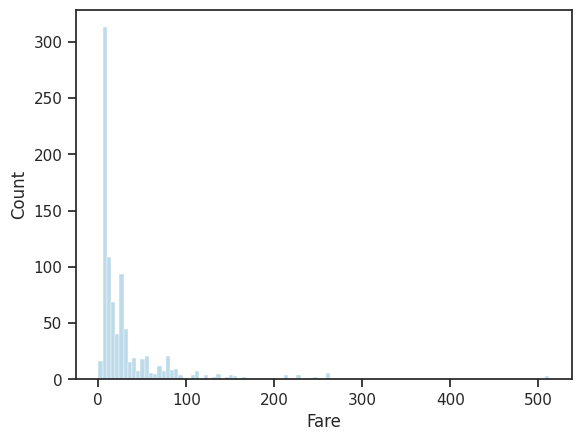

In [275]:
# Create histogram of Fare column of train_data
sns.histplot(data=train_data, x='Fare')

This histogram displays the distribution of fares paid by passengers. Here's the analysis:

- **Fare Distribution**:
  - The histogram illustrates that the majority of passengers paid lower fares, as evidenced by the tall bars on the left side of the plot.
  - There are very few passengers who paid higher fares, as indicated by the progressively decreasing height of bars towards the right side of the plot.
  - The distribution is heavily skewed to the right, meaning that there are a few passengers who paid significantly higher fares compared to the majority who paid lower fares.
  
The distribution of Fare is skewed to the right.

**Reasons for Skewness**:
The skewness in the fare distribution can be attributed to several factors:
1. **Ticket Classes**: The fares are likely influenced by the ticket classes, with first-class tickets being more expensive than second-class and third-class tickets. Since there are typically fewer first-class passengers, their higher fares contribute to the skewness.
2. **Cabin Types and Amenities**: Passengers who booked cabins with better amenities or larger spaces would have paid higher fares, contributing to the skewness towards higher fare values.
3. **Promotional Fares**: Some passengers might have acquired tickets at discounted or promotional rates, resulting in lower fares and contributing to the skewness towards the lower end of the distribution.
4. **Outliers**: There may be outliers in the dataset, such as passengers who purchased exceptionally expensive tickets for premium accommodations, leading to a long tail on the higher fare side and skewing the distribution.

In [276]:
# Compute skewness of Fare column of train_data
print("Skewness of Fare: {}".format(skew(train_data['Fare'])))

Skewness of Fare: 4.7792532923723545


This shows that the distribution of Fare is highly skewed. In this case, we will replace the null values with the median because of this skewness.

In [277]:
# Compute the median of the Fare column of train_data
fare_median = train_data['Fare'].median()

# Fill missing Fare values in test_data with fare_median
test_data['Fare'] = test_data['Fare'].fillna(fare_median)

### Embarked


<Axes: xlabel='Embarked', ylabel='count'>

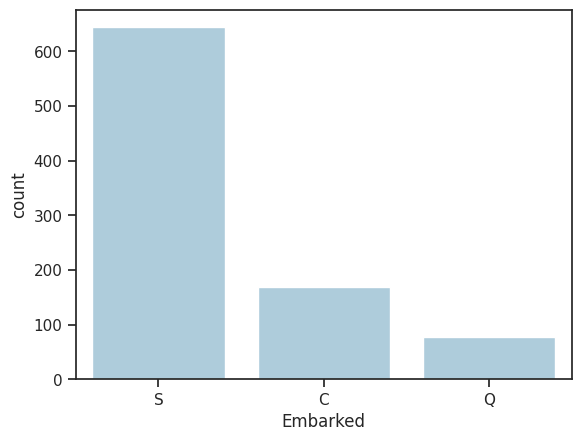

In [278]:
# Create countplot of Embarked column of train_data
sns.countplot(data=train_data, x='Embarked')

This histogram depicts the count of passengers based on the port of embarkation (Embarked). Here's the analysis:

- **Embarked Distribution**:
  - The majority of passengers embarked from port 'S' (Southampton), as indicated by the tallest bar on the left side of the plot.
  - Port 'C' (Cherbourg) has the second highest number of embarked passengers, followed by port 'Q' (Queenstown), which has the fewest embarked passengers.
  
**Interpretation**:
- The distribution suggests that Southampton was the most common port of embarkation for passengers in the dataset.
- Cherbourg had a significant number of embarked passengers, although notably fewer than Southampton.
- Queenstown had the fewest passengers embarking from its port, making it the least common port of embarkation among the three listed.
- Understanding the distribution of passengers across different embarkation ports could provide insights into the demographic composition or travel patterns of the Titanic passengers.

The most frequent port of embarkation is S for Southampton i.e., ‘S’ occurs more than any other value, therefore we would be replacing the ‘NaN’ values with ‘S’.

In [279]:
# Fill missing Embarked values in train_data with mode 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')

### Cabin
The Cabin column may hold some significance in predicting survival, but it has too many missing values for it to be useful. It has to be dropped. There are other features anyway (e.g., Pclass and Fare) that could be used in place of Cabin. The higher the ticket class and fare, the more premium the cabin is expected to be.

In [280]:
# Drop Cabin column from train_data and test_data
for dataset in [train_data, test_data]:
    dataset.drop(columns='Cabin', inplace=True)

In [281]:
# Confirm that there are no more columns with missing values in train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [282]:
# Confirm that there are no more columns with missing values in test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## Encoding with Category

### Sex

In [283]:
# Encode Sex in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Embarked

In [284]:
# Encode Embarked in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [285]:
# Get overview of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [286]:
# Get overview of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [287]:
# See unique values in Sex and Embarked columns of train_data
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_data[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [0 1 2]


In [288]:
# See unique values in Sex and Embarked columns of test_data
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_data[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [2 0 1]


## Feature Engineering
In this section, our objective is to create new features from the existing ones with the aim of enhancing our predictive capability and reducing the number of outliers.

### Title
The Title feature may hold some clues to the prediction of survival. For example, those with more prestigious titles and female titles may be prioritized in the evacuation and consequently have a higher chance of survival.

The names are in the format of Name/Title/Other Names. Hence, we split the names at the first ‘comma’ and pick the title, then we split the title at the ‘full stop’ at its end and take the title alone as in the first line of the cell below.

In [289]:
# Create Title feature for both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [290]:
# Get frequency of each title in train_data
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [291]:
# Check for missing values in Title column of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [292]:
# Check for missing values in Title column of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [293]:
# Replace Mlle with Miss, Ms with Miss, and Mme with Mrs in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Replace any other title with 'Other'
for dataset in [train_data, test_data]:
    dataset.loc[~dataset['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master']), 'Title'] = 'Other'

In [294]:
# Compute survival rate by title in train_data
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)

,Title,Survived
0,Mrs,0.793651
1,Miss,0.702703
2,Master,0.575000
3,Other,0.347826
4,Mr,0.156673


Passengers with a title of Mr have a far lower chance of survival compared to passengers with the following titles: Mrs, Miss, and Master.

<Axes: xlabel='Title', ylabel='Survived'>

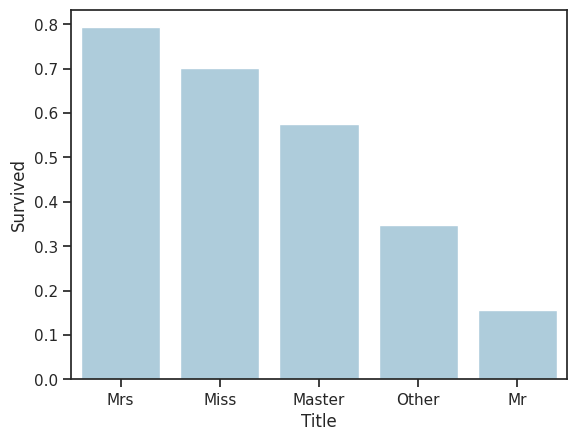

In [295]:
# Create barplot of Title versus Survived in train_data
sns.barplot(x='Title', y='Survived', data=train_data, errorbar=None, order=['Mrs', 'Miss', 'Master', 'Other', 'Mr'])

This bar plot shows the survival rate based on different titles assigned to passengers. Here's the analysis:

- **Survival Rate by Title**:
  - The x-axis represents different titles: "Mrs", "Miss", "Master", "Other", and "Mr".
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers with the title "Mrs" had the highest survival rate among all titles.
  - Those with the title "Miss" also had a relatively high survival rate, although slightly lower than "Mrs".
  - Passengers with the title "Master" had the third-highest survival rate.
  - The survival rate for passengers categorized under "Other" titles is relatively lower compared to the other titles.
  - Passengers categorized as "Mr" had the lowest survival rate among all titles.

- **Conclusion**:
  - The title associated with a passenger seems to have had an impact on survival during the Titanic disaster.
  - Titles such as "Mrs" and "Miss" may have been indicative of marital status or gender, which could have influenced survival rates.
  - Passengers with titles indicating higher social status or gender might have been given priority during the evacuation process, leading to higher survival rates.

Overall, this plot provides insights into the relationship between titles and survival rates among Titanic passengers.

In [296]:
# Map titles to number codes in both train_data and test_data
title_mapping = {"Mrs": 0, "Miss": 1, "Master": 2, "Other": 3, "Mr": 4}
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [297]:
# Drop Name column from train_data and test_data
for dataset in [train_data, test_data]:
    dataset.drop(columns='Name', inplace=True)

### IsMr
IsMr denotes whether the passenger has a title of Mr. IsMr is 1 if title of passenger is Mr. Otherwise, it is 0. We have defined this feature since we observed previously that if the passenger had the title Mr then his survival rate was quite less compared to other titled passengers. Thus, it might help us predict the survival of a passenger more efficiently.

In [298]:
# Create IsMr feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsMr'] = 0
    dataset.loc[dataset['Title'] == 4, 'IsMr'] = 1

In [299]:
# Compute survival rate by IsMr in train_data
print (train_data[['IsMr', 'Survived']].groupby(['IsMr'], as_index=False).mean())

   IsMr  Survived
0     0  0.697861
1     1  0.156673


<Axes: xlabel='IsMr', ylabel='Survived'>

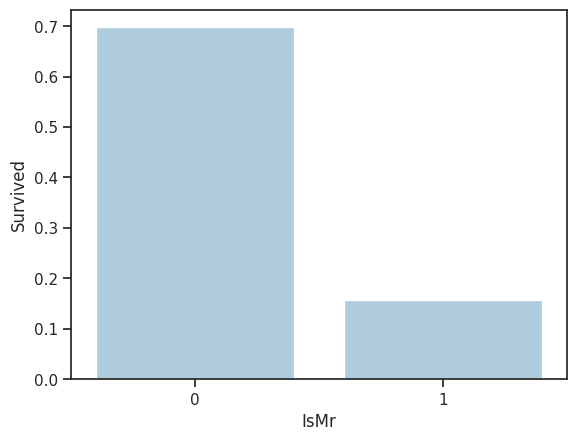

In [300]:
# Create barplot of IsMr versus Survived in train_data
sns.barplot(x='IsMr', y='Survived', data=train_data, errorbar=None)

This bar plot shows the survival rate based on whether a passenger has the title "Mr." or not.

- **Survival Rate by Title**:
  - The x-axis represents whether a passenger has the title "Mr." (IsMr).
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers categorized as "Mr." (IsMr = 1) had a lower survival rate compared to those who did not have the title "Mr." (IsMr = 0).
  - The survival rate for passengers categorized as "Mr." (IsMr = 1) appears to be significantly lower than for those not categorized as "Mr."

- **Conclusion**:
  - The title "Mr." may have been a factor influencing survival, with passengers having this title being less likely to survive.
  - This suggests that other titles or categories may have had different survival rates, and further analysis of titles could provide additional insights into survival patterns among passengers.

Overall, this plot highlights the potential impact of social status or demographic factors, as indicated by titles, on survival during the Titanic disaster.

### AgeGroup
The AgeGroup feature may hold some clues to the prediction of survival. For example, the elderly or senior citizens may have a far lower chance of survival compared to younger passengers. It is better to sort the ages in groups for better visualization.

In [301]:
# Convert data type of Age to integer in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Age'] = dataset['Age'].astype(int)

# Set the number of bands (bins)
num_age_bands = 5

# Create AgeBand using pd.cut()
train_data['AgeBand'] = pd.cut(train_data['Age'], bins=num_age_bands)

# Compute survival rate by AgeBand
print(train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


Passengers whose age falls within (64.0, 80.0] have a far lower chance of survival compared to younger passengers.

<Axes: xlabel='AgeBand', ylabel='Survived'>

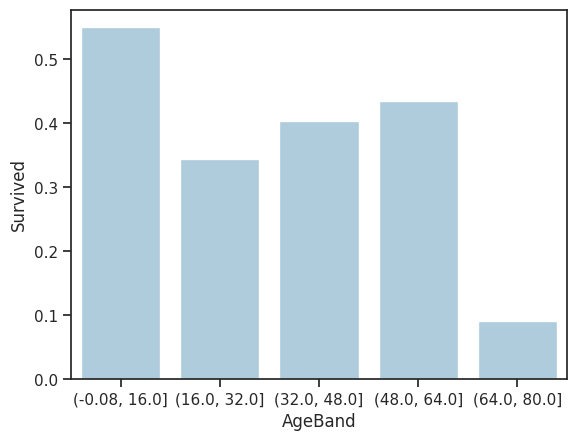

In [302]:
# Create barplot of AgeBand versus Survived in train_data
sns.barplot(x='AgeBand', y='Survived', data=train_data, errorbar=None)

This bar plot shows the survival rate based on different age bands.

- **Survival Rate by Age Band**:
  - The x-axis represents different age bands.
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers in the age band (16.0, 32.0] had the highest survival rate, followed by those in the age band (48.0, 64.0].
  - Passengers in the age band (32.0, 48.0] had a relatively lower survival rate compared to the other age bands.
  - The age band (64.0, 80.0] had the lowest survival rate among all age groups.

- **Conclusion**:
  - Age seems to have an impact on survival, with certain age groups having higher survival rates than others.
  - The age band (16.0, 32.0] had the highest survival rate, which may indicate that younger passengers had a better chance of survival.
  - Conversely, the age band (64.0, 80.0] had the lowest survival rate, suggesting that elderly passengers were less likely to survive.

Overall, this plot provides insights into the relationship between age and survival on the Titanic.

In [303]:
# Map Age to AgeGroup in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['AgeGroup'] = pd.Series()
    dataset.loc[dataset['Age'] <= 16, 'AgeGroup'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeGroup'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeGroup'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeGroup'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeGroup'] = 4

<Axes: xlabel='Pclass', ylabel='AgeGroup'>

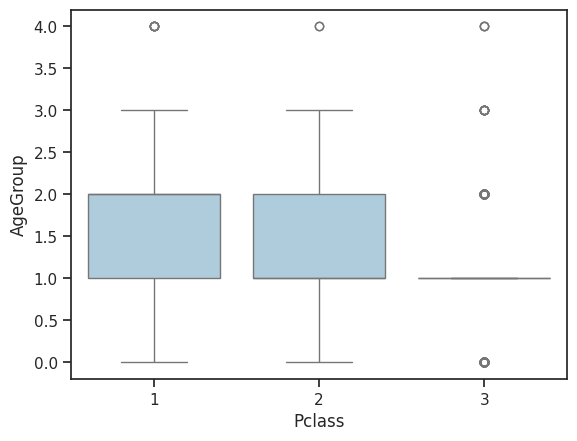

In [304]:
# Drop AgeBand column from train_data
train_data.drop(columns='AgeBand', inplace=True)
sns.boxplot(x = 'Pclass', y = 'AgeGroup', data = train_data)

Compared to the previous graph, we see that the number of outliers have significantly reduced as a result of feature engineering.

### IsElderly
IsElderly denotes whether the passenger is an elderly (i.e., 65 years old or older). IsElderly is 1 if age of passenger is at least 65 and 0 if age of passenger is below 65. Again we can use the same argument as IsMr to justify why we have added this feature.

In [305]:
# Create IsElderly feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsElderly'] = 0
    dataset.loc[dataset['Age'] >= 65, 'IsElderly'] = 1

In [306]:
# Compute survival rate by IsElderly in train_data
print (train_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean())

   IsElderly  Survived
0          0  0.387500
1          1  0.090909


<Axes: xlabel='IsElderly', ylabel='Survived'>

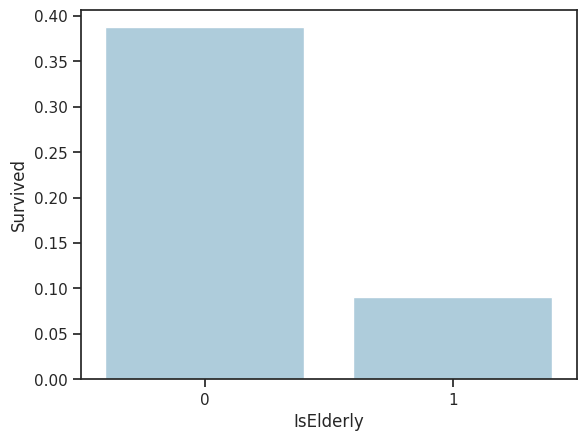

In [307]:
# Create barplot of IsElderly versus Survived in train_data
sns.barplot(x='IsElderly', y='Survived', data=train_data, errorbar=None)

This bar plot shows the survival rate based on whether a passenger is elderly or not (where 0 indicates not elderly and 1 indicates elderly).

- **Survival Rate**: The height of the bars represents the survival rate.
  - For passengers categorized as not elderly (IsElderly = 0), the survival rate is approximately 0.30.
  - For passengers categorized as elderly (IsElderly = 1), the survival rate is approximately 0.15.

- **Interpretation**:
  - The survival rate for non-elderly passengers is higher compared to elderly passengers.
  - This suggests that being categorized as elderly may have been a factor affecting survival, with a lower likelihood of survival among elderly passengers.

Overall, this plot provides a clear comparison of the survival rates between elderly and non-elderly passengers.

### FamilySize
FamilySize represents the number of people who belong to the same family and may hold clues to the prediction of survival. The number includes the passenger, their siblings and spouse, and their parents and children. Passengers with a stronger support system may have a higher chance of survival.

In [308]:
# Create FamilySize feature for both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [309]:
# Compute survival rate by FamilySize in train_data
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

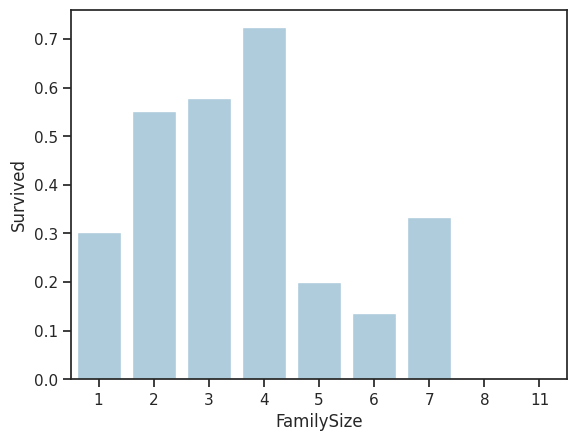

In [310]:
# Create barplot of FamilySize versus Survived in train_data
sns.barplot(x='FamilySize', y='Survived', data=train_data, errorbar=None)

This bar plot shows the survival rate based on the size of the family a passenger was traveling with.

- **Survival Rate by Family Size**:
  - The x-axis represents different family sizes.
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers traveling alone (FamilySize = 1) had a relatively lower survival rate compared to those traveling with larger families.
  - As the family size increased from 2 to 4, the survival rate also increased gradually.
  - Passengers with larger families, such as family sizes of 5, 6, and 7, had the highest survival rates among all family sizes.
  - However, for family sizes beyond 7, the survival rate decreased again.

- **Conclusion**:
  - The size of the family a passenger was traveling with appears to have had an impact on survival during the Titanic disaster.
  - Passengers traveling alone may have had lower chances of survival, possibly due to a lack of assistance or support during the evacuation process.
  - Conversely, passengers traveling with larger families might have benefited from mutual assistance or priority in evacuation, leading to higher survival rates.

Overall, this plot provides insights into the relationship between family size and survival rates among Titanic passengers.

### IsAlone
IsAlone denotes whether the passenger is traveling alone or with family. IsAlone is 1 if passenger travels alone and 0 if passenger travels with family.

In [311]:
# Create IsAlone feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [312]:
# Compute survival rate by IsAlone in train_data
print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<Axes: xlabel='IsAlone', ylabel='Survived'>

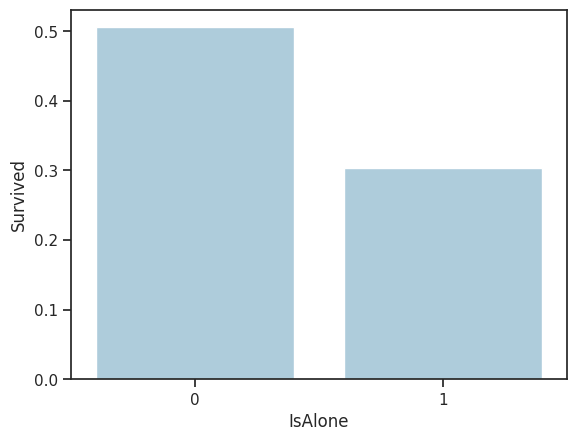

In [313]:
# Create barplot of IsAlone versus Survived in train_data
sns.barplot(x='IsAlone', y='Survived', data=train_data, errorbar=None)

This bar plot illustrates the survival rate based on whether a passenger was traveling alone or not.

- **Survival Rate by IsAlone**:
  - The x-axis represents whether a passenger was traveling alone (IsAlone = 1) or not (IsAlone = 0).
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers who were alone (IsAlone = 1) had a slightly higher survival rate compared to those who were not alone (IsAlone = 0).
  - This suggests that passengers traveling alone may have had a better chance of survival during the Titanic disaster.

- **Conclusion**:
  - Being alone may have provided certain advantages during the evacuation process, such as easier mobility or quicker decision-making.
  - However, the difference in survival rates between passengers traveling alone and those traveling with companions is not substantial, indicating that factors other than being alone may have played a more significant role in determining survival.

Overall, this plot provides insights into the relationship between traveling alone and survival rates among Titanic passengers.

### FareGroup

In [314]:
# Set the number of quantiles
num_fare_quantiles = 4

# Create FareBand using pd.cut()
train_data['FareBand'] = pd.qcut(train_data['Fare'], q=num_fare_quantiles)

# Compute survival rate by AgeBand
print(train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


The chance of survival increases as the fare band increases.

<Axes: xlabel='FareBand', ylabel='Survived'>

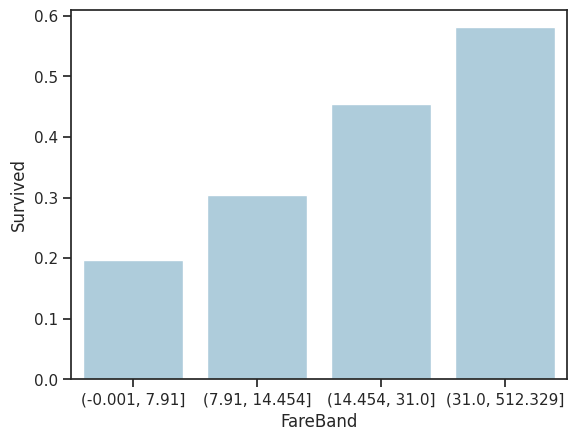

In [315]:
# Create barplot of FareBand versus Survived in train_data
sns.barplot(x='FareBand', y='Survived', data=train_data, errorbar=None)

This bar plot represents the survival rate categorized by fare bands.

- **Survival Rate by FareBand**:
  - The x-axis represents different fare bands, which are categorized based on the fare paid by passengers.
  - The y-axis represents the survival rate.

- **Interpretation**:
  - Passengers who belonged to the highest fare band (31.0, 512.329] had the highest survival rate among all fare bands.
  - Conversely, passengers who belonged to the lowest fare band (-0.001, 7.91] had the lowest survival rate.

- **Conclusion**:
  - There appears to be a positive correlation between the fare paid and the likelihood of survival, with passengers who paid higher fares having a better chance of survival.
  - This might indicate that passengers who paid higher fares had access to better accommodations or were given priority during the evacuation process.
  - However, it's essential to consider other factors that could have influenced survival rates, such as passenger class, age, and gender.

Overall, this plot provides insights into the relationship between fare bands and survival rates among Titanic passengers, suggesting a potential correlation between fare paid and survival.

In [316]:
# Map Fare to FareGroup in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['FareGroup'] = pd.Series()
    dataset.loc[dataset['Fare'] <= 7.91, 'FareGroup'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'FareGroup'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'FareGroup'] = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'FareGroup'] = 3

In [317]:
# Drop FareBand column from train_data
train_data.drop(columns='FareBand', inplace=True)

In [318]:
# Check first few rows of train_data
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,1,0,3,0,22,1,0,A/5 21171,7.2500,0,4,1,1,0,2,0,0
1,2,1,1,1,38,1,0,PC 17599,71.2833,1,0,0,2,0,2,0,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,1,1,1
3,4,1,1,1,35,1,0,113803,53.1000,0,0,0,2,0,2,0,3
4,5,0,3,0,35,0,0,373450,8.0500,0,4,1,2,0,1,1,1


In [319]:
# Check first few rows of test_data
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,892,3,0,34,0,0,330911,7.8292,2,4,1,2,0,1,1,0
1,893,3,1,47,1,0,363272,7.0000,0,0,0,2,0,2,0,0
2,894,2,0,62,0,0,240276,9.6875,2,4,1,3,0,1,1,1
3,895,3,0,27,0,0,315154,8.6625,0,4,1,1,0,1,1,1
4,896,3,1,22,1,1,3101298,12.2875,0,0,0,1,0,3,0,1


PassengerId, serving as a unique identifier for each passenger, holds no predictive value regarding their survival status. Thus, it is necessary to remove it from both the train_data and test_data datasets.

Regarding the Ticket feature, it comprises 681 distinct values within the train_data dataset, which encompasses 891 total rows. While it may contain potentially relevant information, akin to Cabin, it can be disregarded from both train_data and test_data. Any pertinent details encapsulated by this attribute are anticipated to be better captured by variables such as Pclass (denoting ticket class) and Fare.

As Survived serves as the target variable, it must be excluded from train_data.

Considering Age, it is advisable to eliminate it from both train_data and test_data due to its disparate scale compared to other features, particularly as AgeGroup has already been established.

Similarly, Fare should be removed from train_data and test_data due to its divergent scale from other features, especially since FareGroup has already been derived.

In [320]:
# Define X_train, X_test, y_train, y_test
X = train_data.drop(columns=['PassengerId', 'Survived', 'Age', 'Ticket', 'Fare'], inplace=False)
#This(X_Test) denotes the Original Test Data on which we
# are going to test the best algorithm.
# We can't use it for model building since we don't have the 'Survived' feature in this data.
X_Test = test_data.drop(columns=['PassengerId', 'Age', 'Ticket', 'Fare'], inplace=False)
y = train_data['Survived']
#Split the Data into X_train, X_test, y_train, y_test to set it up for ML Algorithms
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [321]:
# Check shape of X_train, X_test, and y_train
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of X_Test: ", X_Test.shape)

Shape of X_train:  (623, 12)
Shape of y_train:  (623,)
Shape of X_test:  (268, 12)
Shape of y_test:  (268,)
Shape of X_Test:  (418, 12)


In [322]:
# Check remaining features in X_train
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

In [323]:
# Check remaining features in X_Test
X_Test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

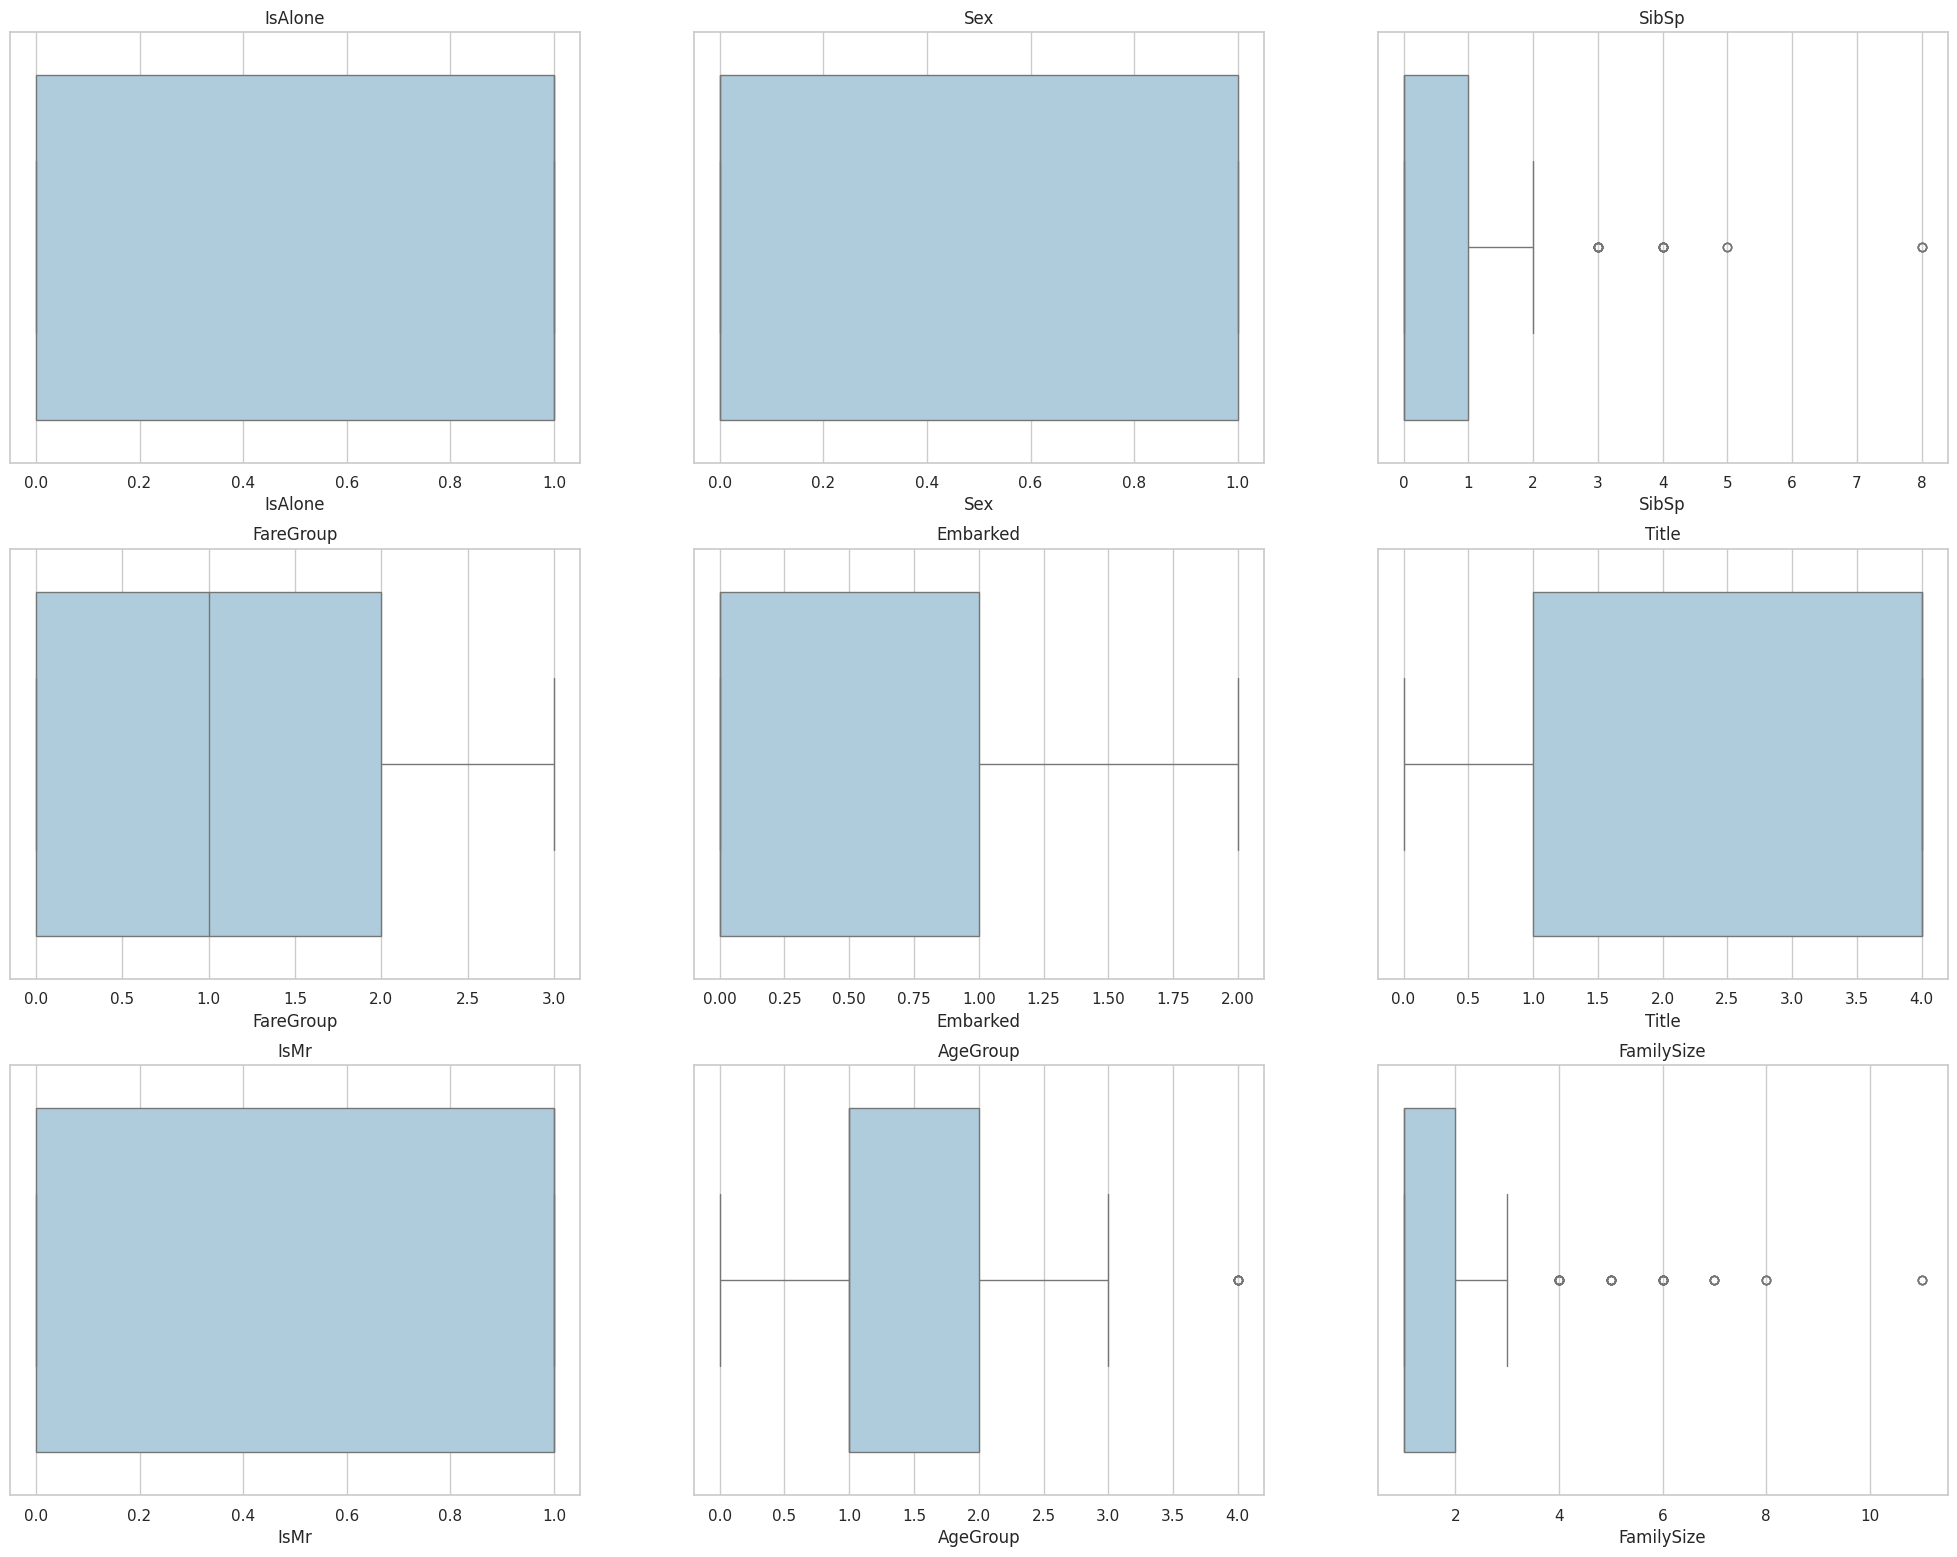

In [324]:
# Plot the box plots to observe the outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 19))

# Set seaborn style
sns.set_style("whitegrid")

# Create subplots

ax = plt.subplot(332)
sns.boxplot(x=X_train['Sex'], ax=ax)
ax.set_title('Sex')

ax = plt.subplot(333)
sns.boxplot(x=X_train['SibSp'], ax=ax)
ax.set_title('SibSp')

ax = plt.subplot(335)
sns.boxplot(x=X_train['Embarked'], ax=ax)
ax.set_title('Embarked')

ax = plt.subplot(336)
sns.boxplot(x=X_train['Title'], ax=ax)
ax.set_title('Title')

ax = plt.subplot(337)
sns.boxplot(x=X_train['IsMr'], ax=ax)
ax.set_title('IsMr')

ax = plt.subplot(338)
sns.boxplot(x=X_train['AgeGroup'], ax=ax)
ax.set_title('AgeGroup')

ax = plt.subplot(339)
sns.boxplot(x=X_train['FamilySize'], ax=ax)
ax.set_title('FamilySize')

ax = plt.subplot(331)
sns.boxplot(x=X_train['IsAlone'], ax=ax)
ax.set_title('IsAlone')

ax = plt.subplot(334)
sns.boxplot(x=X_train['FareGroup'], ax=ax)
ax.set_title('FareGroup')
plt.show()


We now observe that the number of outliers has significantly reduced and our aim was fulfilled by feature engineering. Even though there are still some outliers left, but those won't be altering our model much since there are only a few of them.

## Exploratory Data Analysis

### Relationship between Features

The cell below contains code to check the degree of correlation between the columns; take note that each column is expected to be perfectly correlated with itself. The columns with the most correlation are the ‘IsMr’ (sibling to parent ratio) column and ‘Title’ columns. Similarly, we see that 'FamilySize' and 'SibSp' are also quite closely related which might be true since the greater the family size, the more siblings or spouses it has.

We have first split the Original Train data into train and test subparts and then performed EDA on the train subpart stored in the variable X_train. This is done since we can't use the provided test data for model building since it doesn't have the 'Survived' feature. Thus, it is only used for prediction and we can't calculate the model accuracy using that data. From this point, we will assume that we have a single dataset and that dataset has been split into 4 parts for the model building procedure.

In [325]:
# Create a correlation matrix of train_features
correlation_matrix_features = X_train.corr()
correlation_matrix_features

,Pclass,Sex,SibSp,Parch,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
Pclass,1.000000,-0.149767,0.066634,-0.002879,0.020211,0.161806,0.163578,-0.356845,-0.082622,0.043403,0.161088,-0.639736
Sex,-0.149767,1.000000,0.145244,0.256848,0.133012,-0.945433,-0.869568,-0.057738,-0.093376,0.228546,-0.347842,0.285888
SibSp,0.066634,0.145244,1.000000,0.419345,-0.058524,-0.219978,-0.262657,-0.215087,-0.047920,0.886819,-0.589607,0.398870
Parch,-0.002879,0.256848,0.419345,1.000000,-0.100357,-0.341154,-0.338382,-0.128557,-0.028312,0.791405,-0.595820,0.411898
Embarked,0.020211,0.133012,-0.058524,-0.100357,1.000000,-0.105032,-0.117147,-0.030568,0.051576,-0.090493,0.038039,-0.090096
Title,0.161806,-0.945433,-0.219978,-0.341154,-0.105032,1.000000,0.944903,0.080767,0.093594,-0.321784,0.455940,-0.355228
IsMr,0.163578,-0.869568,-0.262657,-0.338382,-0.117147,0.944903,1.000000,0.125343,0.081452,-0.349110,0.430035,-0.353222
AgeGroup,-0.356845,-0.057738,-0.215087,-0.128557,-0.030568,0.080767,0.125343,1.000000,0.413966,-0.210270,0.112120,0.103277
IsElderly,-0.082622,-0.093376,-0.047920,-0.028312,0.051576,0.093594,0.081452,0.413966,1.000000,-0.046679,0.049765,0.004700
FamilySize,0.043403,0.228546,0.886819,0.791405,-0.090493,-0.321784,-0.349110,-0.210270,-0.046679,1.000000,-0.700310,0.478253


<Axes: >

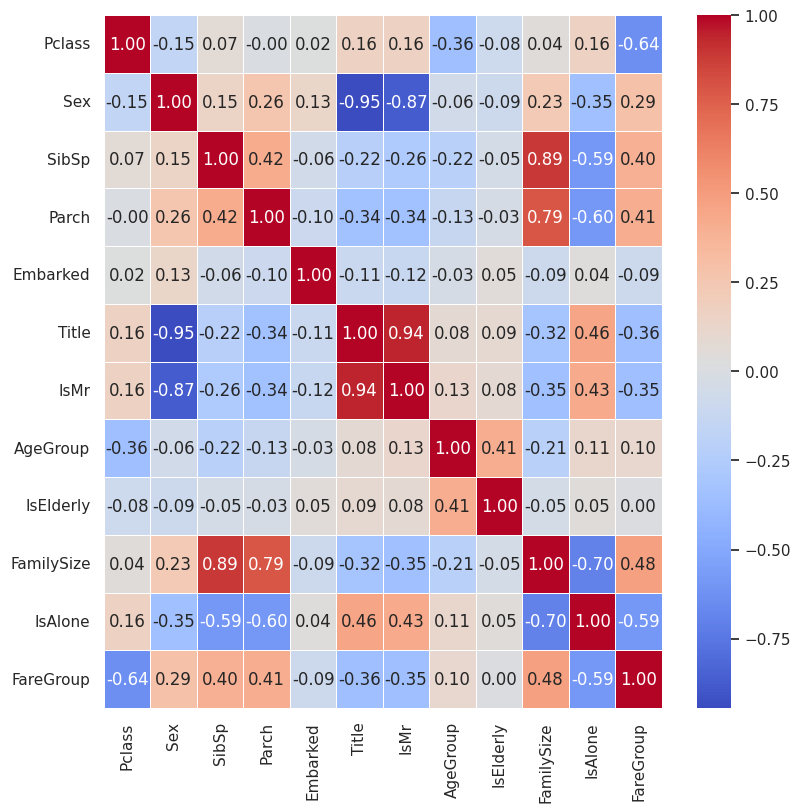

In [326]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)




- **Key Observations**:
  - There's a strong negative correlation between `Pclass` (Passenger Class) and `FareGroup`, indicating that passengers in higher classes paid higher fares.
  - `Title` shows significant correlations with `Sex` and `IsMr`, which is expected as titles are often gender-specific.
  - `AgeGroup` has a moderate positive correlation with `IsElderly`, indicating that the elderly are more likely to belong to certain age groups.
  - `FamilySize` and `IsAlone` show a strong negative correlation, suggesting that passengers traveling alone had smaller family sizes.
  - `FareGroup` and `Pclass` exhibit a strong negative correlation, indicating that passengers in higher classes paid higher fares, as expected.


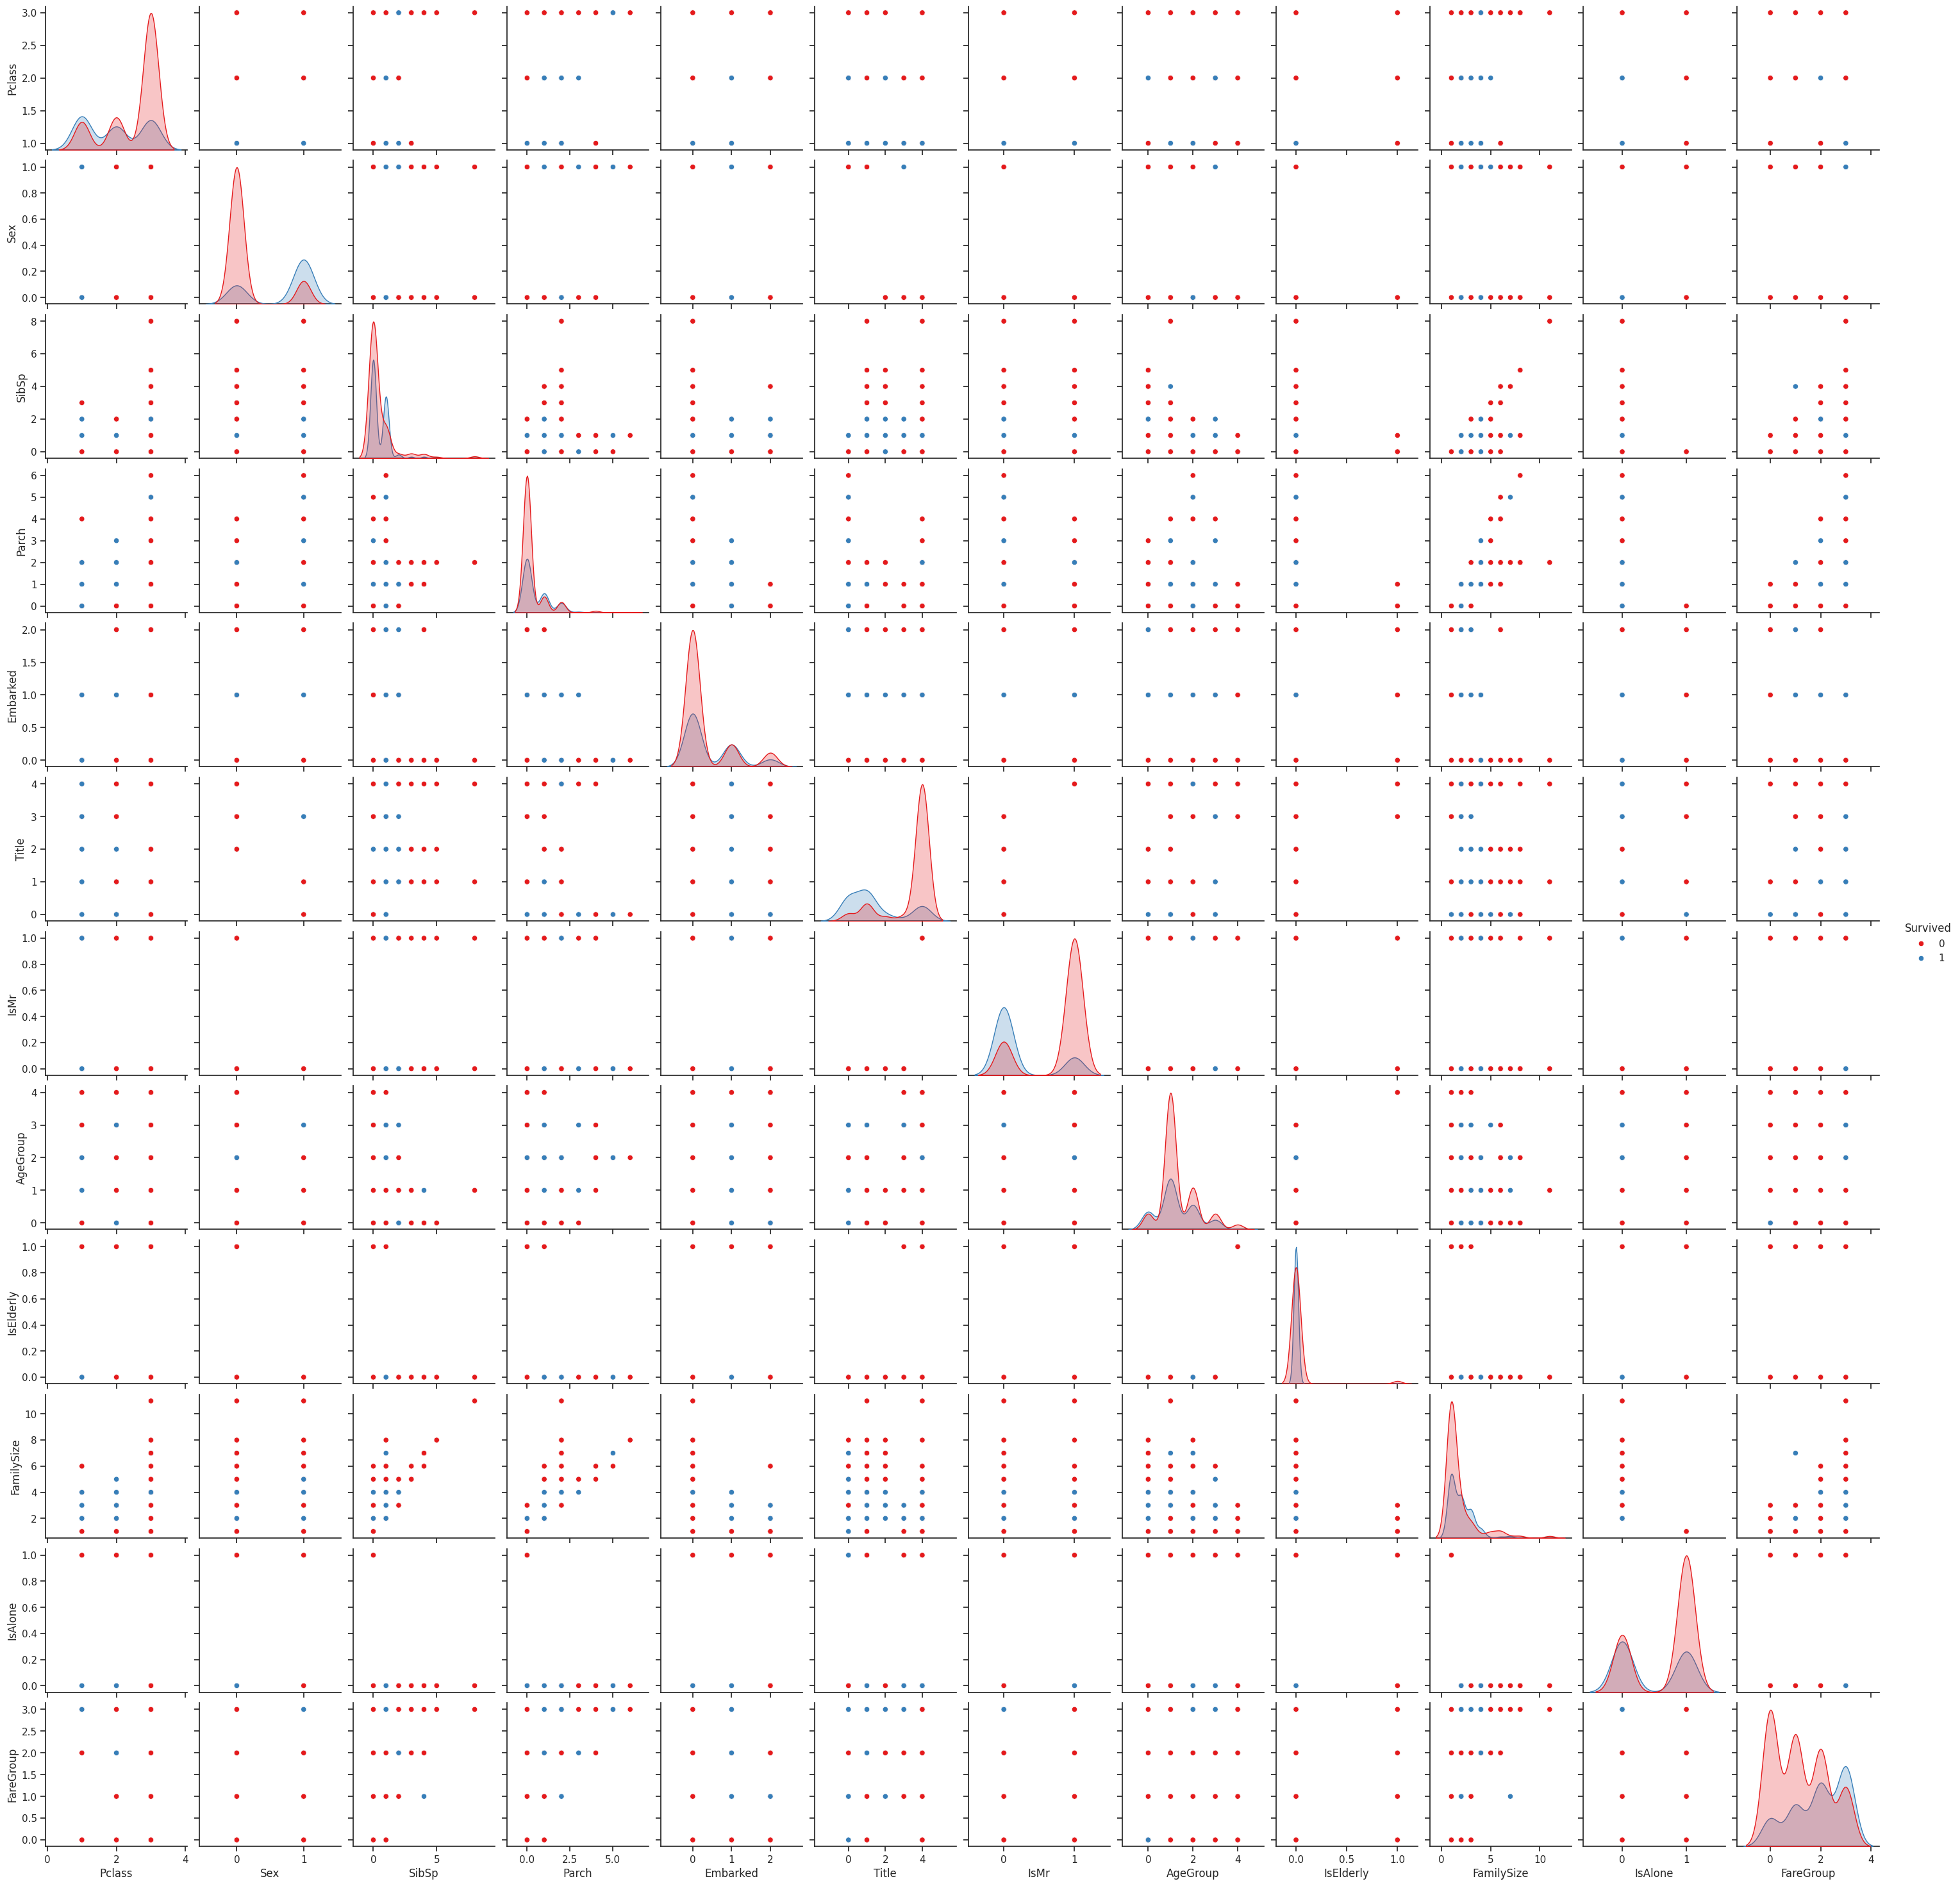

In [327]:
import seaborn as sns
sns.set(style="ticks")

# Concatenate X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Plot pairplot
sns.pairplot(data=train_df, hue='Survived',palette='Set1')
plt.show()

In [328]:
# Set correlation thresholds
highly_correlated_threshold = 0.7
moderately_correlated_threshold = 0.5

# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs = []

# Define function to determine correlation level
def get_correlation_level(correlation_value):
    if abs(correlation_value) >= highly_correlated_threshold:
        return 'Highly correlated'
    elif abs(correlation_value) >= moderately_correlated_threshold:
        return 'Moderately correlated'
    else:
        return None

# Iterate through pairs of features and accumulate moderately and highly correlated pairs
for i in range(len(correlation_matrix_features.columns)):
    for j in range(i + 1, len(correlation_matrix_features.columns)):
        feature1, feature2 = correlation_matrix_features.columns[i], correlation_matrix_features.columns[j]
        correlation_value = correlation_matrix_features.loc[feature1, feature2]
        correlation_level = get_correlation_level(correlation_value)

        if correlation_level is not None:
            correlated_pairs.append({'Feature 1': feature1,
                                     'Feature 2': feature2,
                                     'Correlation Value': correlation_value,
                                     'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_df = pd.DataFrame(correlated_pairs)

print(correlated_pairs_df)

    Feature 1   Feature 2  Correlation Value      Correlation Level
0      Pclass   FareGroup          -0.639736  Moderately correlated
1         Sex       Title          -0.945433      Highly correlated
2         Sex        IsMr          -0.869568      Highly correlated
3       SibSp  FamilySize           0.886819      Highly correlated
4       SibSp     IsAlone          -0.589607  Moderately correlated
5       Parch  FamilySize           0.791405      Highly correlated
6       Parch     IsAlone          -0.595820  Moderately correlated
7       Title        IsMr           0.944903      Highly correlated
8  FamilySize     IsAlone          -0.700310      Highly correlated
9     IsAlone   FareGroup          -0.593065  Moderately correlated


### Relationships between Target Variable and Features

In [329]:
# Create a matrix of correlation between target variable and each feature
# Concatenate X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
target_variable = 'Survived'

# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Extract the correlation of the target variable with other features
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Display the correlation matrix
print("Correlation of the target variable (Survived) with each feature:")
print(correlation_with_target)

Correlation of the target variable (Survived) with each feature:
Pclass       -0.347133
Sex           0.566576
SibSp        -0.010059
Parch         0.127910
Embarked      0.118563
Title        -0.599064
IsMr         -0.582287
AgeGroup     -0.041480
IsElderly    -0.070162
FamilySize    0.058337
IsAlone      -0.256147
FareGroup     0.314242
Name: Survived, dtype: float64


In [330]:
# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs_target = []

# Iterate through features and calculate correlation with the target variable 'Survived'
for feature in correlation_with_target.index:
    correlation_value = correlation_with_target.loc[feature]
    correlation_level = get_correlation_level(correlation_value)

    if correlation_level is not None:
        correlated_pairs_target.append({'Feature': feature,
                                        'Target Variable': 'Survived',
                                        'Correlation Value': correlation_value,
                                        'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_target_df = pd.DataFrame(correlated_pairs_target)

print(correlated_pairs_target_df)

  Feature Target Variable  Correlation Value      Correlation Level
0     Sex        Survived           0.566576  Moderately correlated
1   Title        Survived          -0.599064  Moderately correlated
2    IsMr        Survived          -0.582287  Moderately correlated


Let us look at the percentage of people who survived.

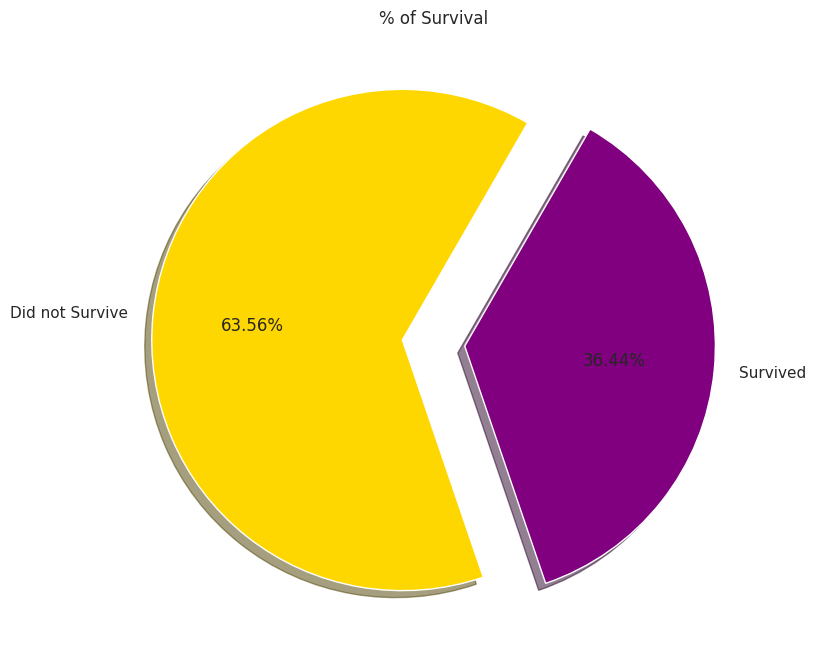

In [331]:
import matplotlib.pyplot as plt

# Data
labels = ['Did not Survive','Survived']
sizes = y_train.value_counts() # Number of passengers in each category
colors = ['#FFD700', '#800080']  # Colors for each category
explode = (0, 0.25)  # Explode the 'Survived' slice

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=60, shadow=True,)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('% of Survival')
plt.show()

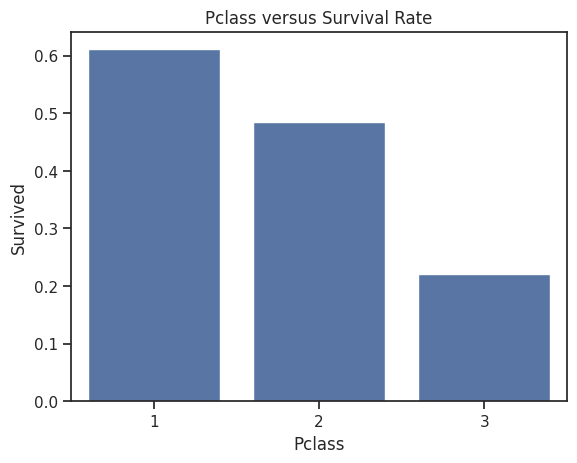

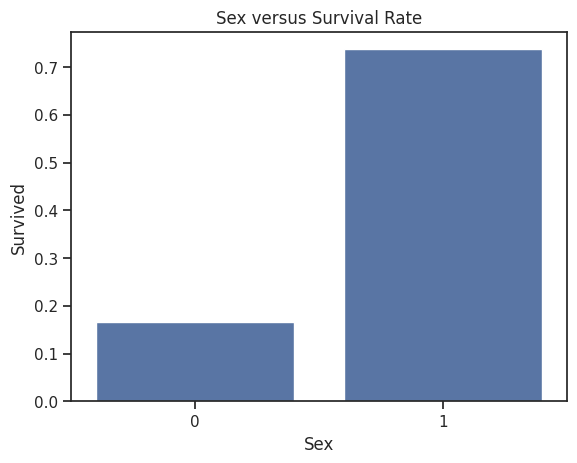

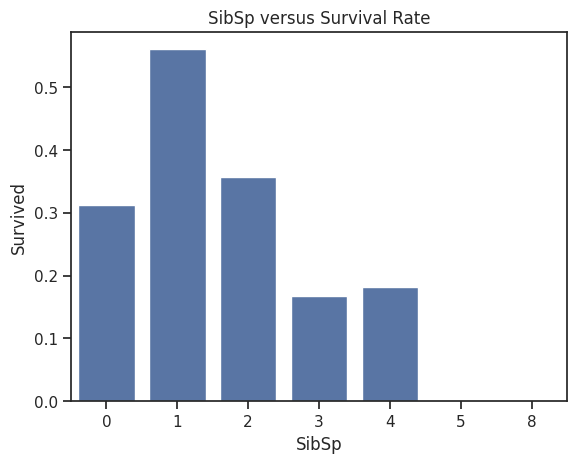

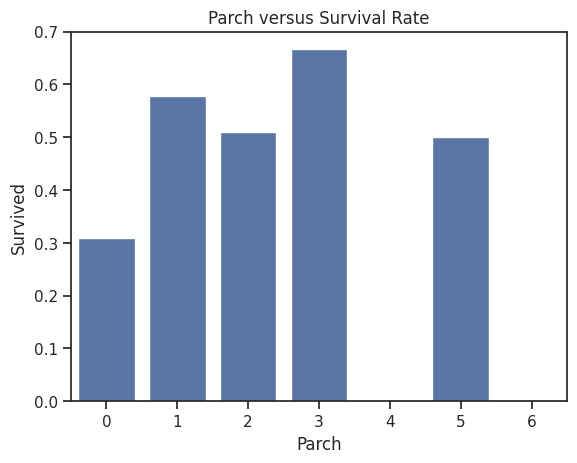

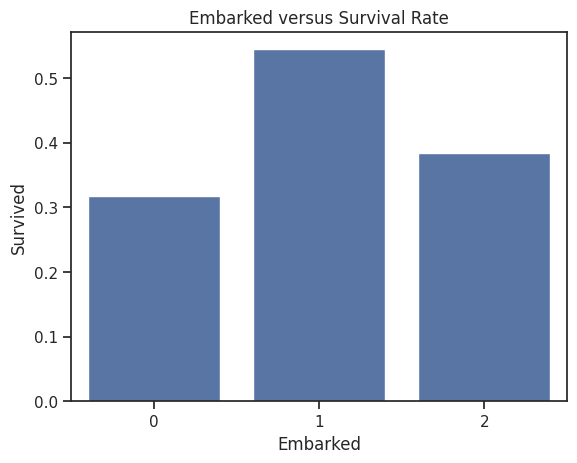

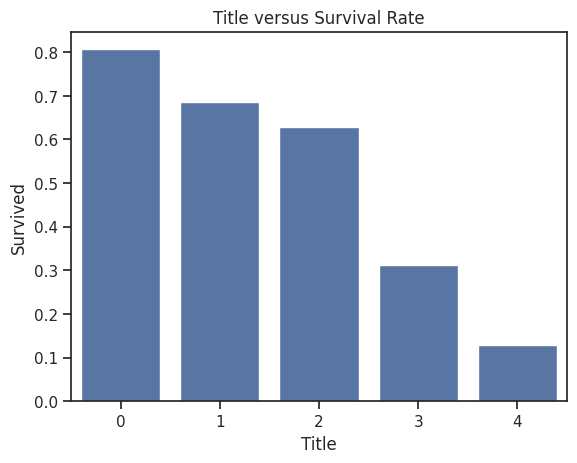

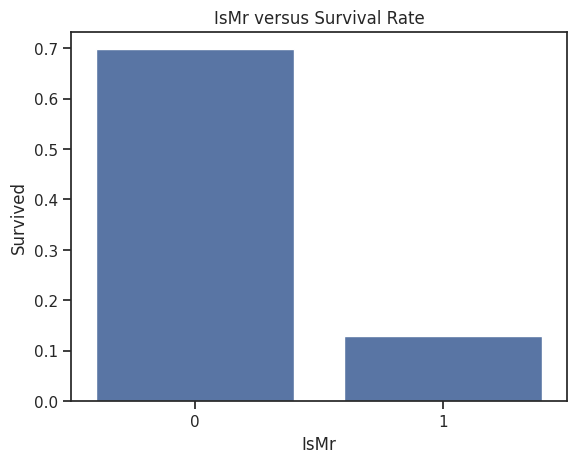

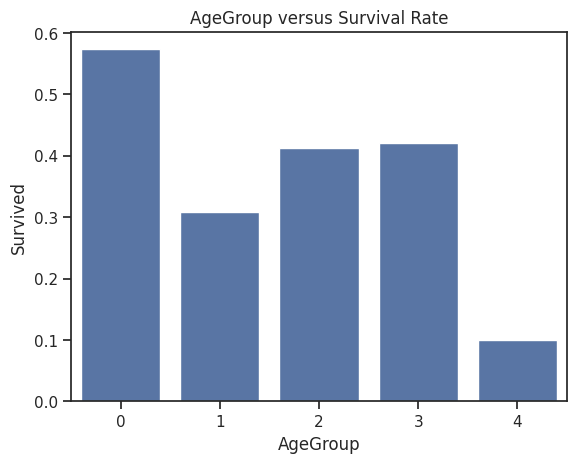

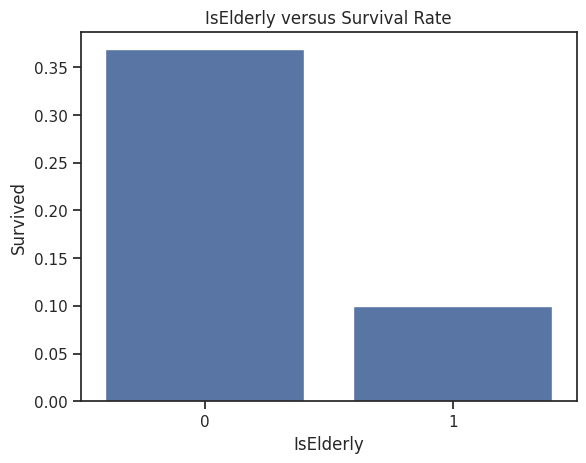

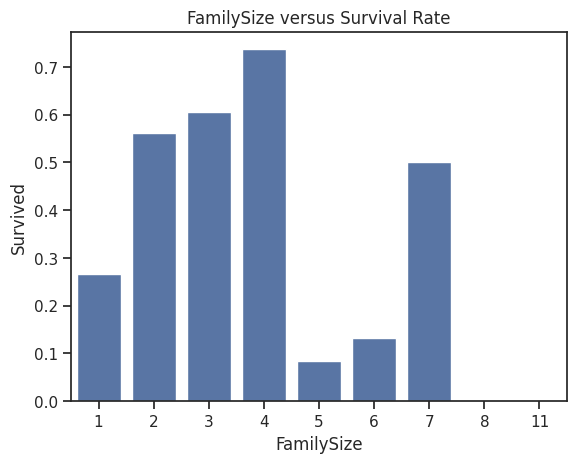

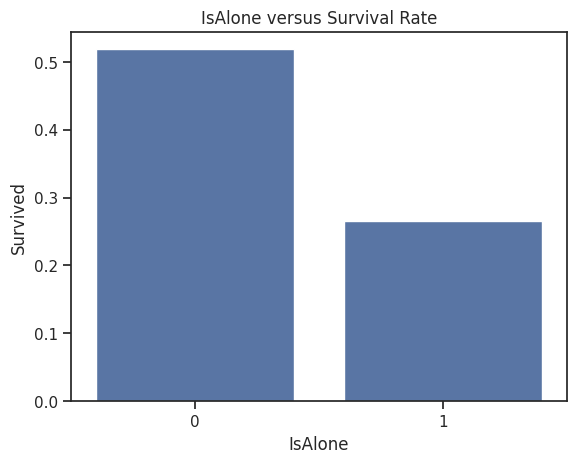

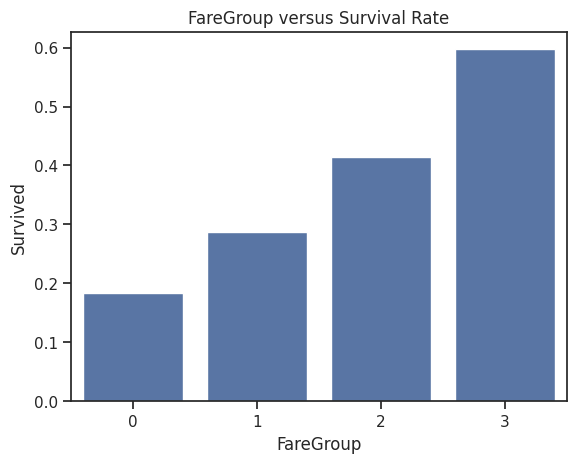

In [332]:
# Iterate over each feature in X_train
for feature in X_train.columns:
    # Create barplot for current feature versus Survived
    sns.barplot(x=X_train[feature], y=y_train, errorbar=None)
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(f'{feature} versus Survival Rate')
    plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

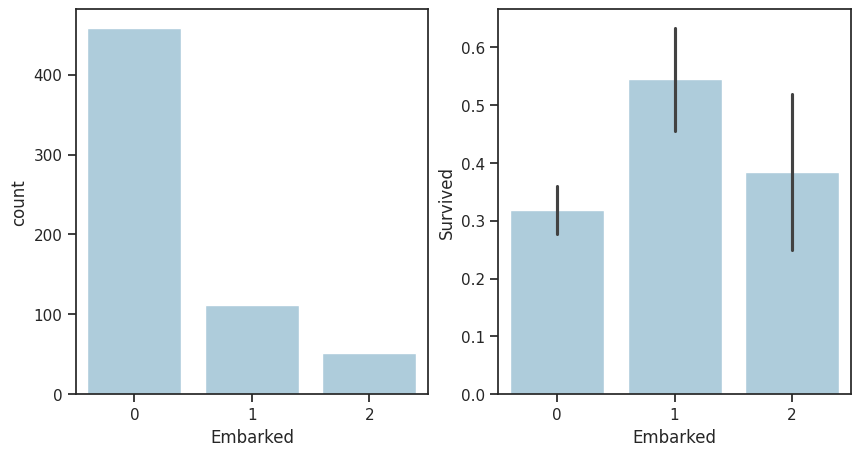

In [333]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='Embarked')
sns.barplot(ax=axes[1],data=X_train, x= 'Embarked', y=y_train)


These are two plots displaying the distribution of passengers across different embarked ports (0, 1, and 2) and their survival rates.

- **Left Plot (Count)**:
  - It shows the count of passengers embarked from each port.
  - Port 0 seems to have the highest number of passengers, followed by port 1, and then port 2.

- **Right Plot (Survival Rate)**:
  - It illustrates the survival rate of passengers embarked from each port along with error bars representing the confidence interval.
  - Port 0 (likely corresponding to Southampton) has a comparatively lower survival rate.
  - Port 1 (likely corresponding to Cherbourg) has the highest survival rate among the three ports.
  - Port 2 (likely corresponding to Queenstown) has a moderate survival rate, lower than Cherbourg but higher than Southampton.

These plots indicate that the port of embarkation might have had some influence on the survival chances of passengers. Further analysis could explore why passengers from certain ports had higher survival rates compared to others.


Below is a look at the survival rate of men and women with respect to where they embarked.

<Axes: xlabel='Embarked', ylabel='Survived'>

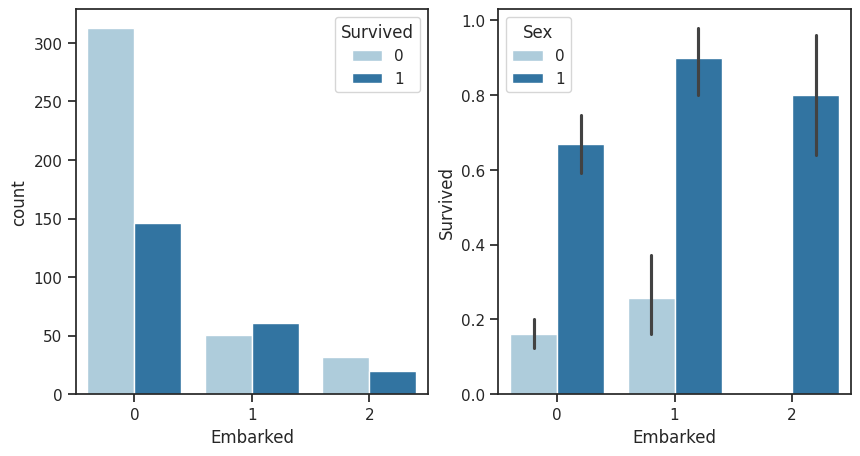

In [334]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='Embarked', hue=y_train)
sns.barplot(ax=axes[1],data=X_train, x= 'Embarked', y=y_train, hue='Sex')

These are two sets of plots displaying the relationship between the port of embarkation, passenger survival, and gender.

- **Left Plots**:
  - The left plots show the count of passengers grouped by the port of embarkation (0, 1, and 2) and their survival status (0 for not survived, 1 for survived).
  - It indicates the distribution of passengers who survived and did not survive according to the port of embarkation.
  - Port 0 (likely corresponding to Southampton) had the highest number of passengers embarked, both survivors and non-survivors, followed by ports 1 (likely Cherbourg) and 2 (likely Queenstown).

- **Right Plots**:
  - The right plots depict the survival rate of passengers based on the port of embarkation and gender.
  - It provides insights into the survival rates among male and female passengers embarked from different ports.
  - Female passengers tend to have higher survival rates compared to male passengers, regardless of the port of embarkation.
  - Notably, passengers embarked from port 1 (likely Cherbourg) had the highest survival rates among both males and females, while passengers embarked from port 0 (likely Southampton) had the lowest survival rates.

Overall, these plots suggest that both gender and the port of embarkation might have influenced the survival chances of passengers aboard the Titanic. Further analysis could delve deeper into the reasons behind these observed patterns.

We can now again look at the survival rate with respect to a passengers class (Pclass) in detail.

<Axes: xlabel='Sex', ylabel='Survived'>

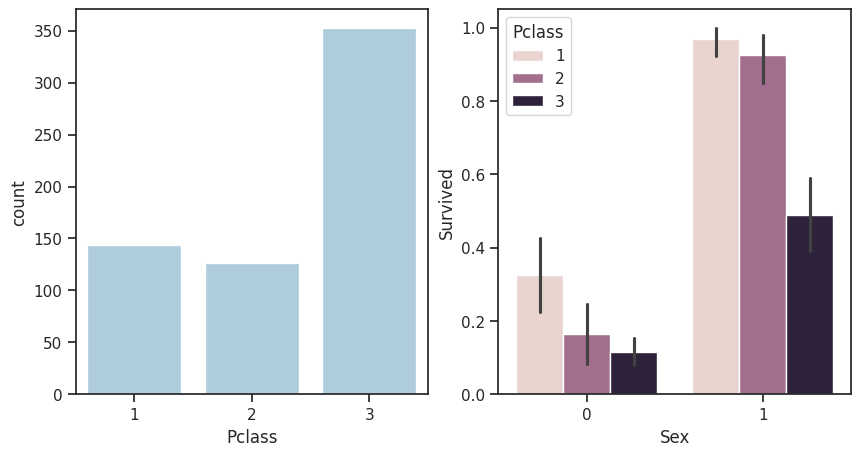

In [335]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='Pclass')
sns.barplot(ax=axes[1], data=X_train,x='Sex',y=y_train, hue="Pclass")

These plots represent the relationship between passenger class (Pclass), passenger gender (Sex), and survival.

- **Left Plots**:
  - The left plot shows the count of passengers grouped by passenger class (1, 2, and 3).
  - It indicates the distribution of passengers across different passenger classes.
  - Class 3 had the highest number of passengers, followed by class 1 and then class 2.

- **Right Plots**:
  - The right plot depicts the survival rate of passengers based on passenger class and gender.
  - It provides insights into the survival rates among male and female passengers across different passenger classes.
  - Female passengers tend to have higher survival rates compared to male passengers in all passenger classes.
  - Passengers in class 1 had the highest survival rates, followed by class 2 and then class 3.

Overall, these plots suggest that both passenger class and gender significantly influenced the survival chances of passengers aboard the Titanic.


Let us now focus on survival rates with respect to age.

<Axes: xlabel='AgeGroup', ylabel='Survived'>

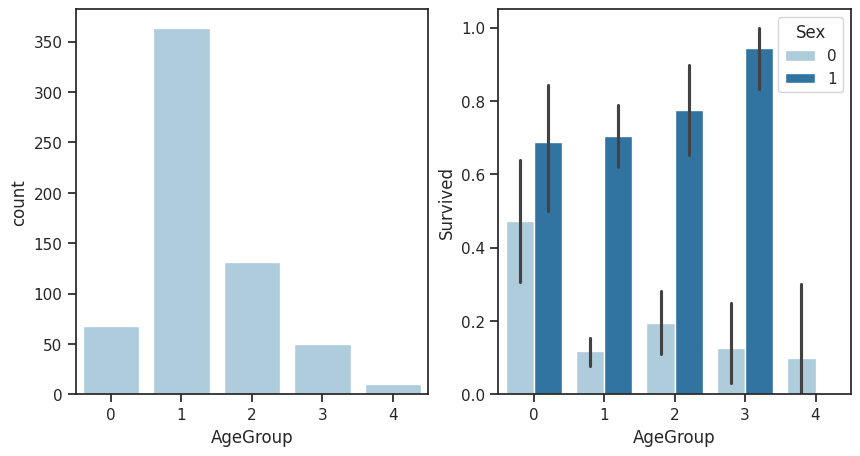

In [336]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='AgeGroup')
sns.barplot(ax=axes[1], data=X_train,x="AgeGroup",y=y_train, hue='Sex')

These plots depict the relationship between age group (AgeGroup) and survival, as well as between age group and gender (Sex).

- **Left Plots**:
  - The left plot shows the count of passengers grouped by age group (0, 1, 2, 3, and 4).
  - It indicates the distribution of passengers across different age groups.
  - Age group 1 (children) had the highest number of passengers, followed by age group 2 (young adults), age group 3 (adults), and age group 0 (infants), while age group 4 (elderly) had the lowest count.

- **Right Plots**:
  - The right plot depicts the survival rate of passengers based on age group and gender.
  - It provides insights into the survival rates among male and female passengers across different age groups.
  - Female passengers tend to have higher survival rates compared to male passengers in all age groups.
  - Among children (age group 1), both male and female passengers had relatively higher survival rates compared to other age groups.
  - Elderly passengers (age group 4) had the lowest survival rates among all age groups.

Overall, these plots suggest that both age group and gender significantly influenced the survival chances of passengers aboard the Titanic, with children having relatively higher survival rates compared to other age groups. Additionally, female passengers had higher survival rates across all age groups.

This observation is further elucidated by the graph below, which provides a more detailed comparison of survival rates between males and females across different age groups.

<Axes: xlabel='Sex', ylabel='Survived'>

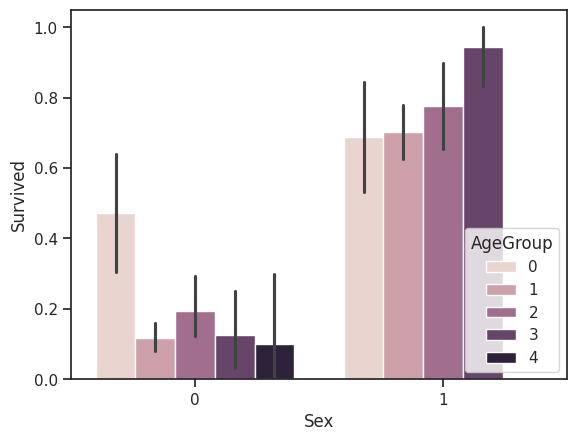

In [337]:
sns.barplot(data=X_train, x='Sex',hue='AgeGroup',  y=y_train)

Let us further look at the graph between the survival rates of Siblings and Spouses.

<Axes: xlabel='SibSp', ylabel='count'>

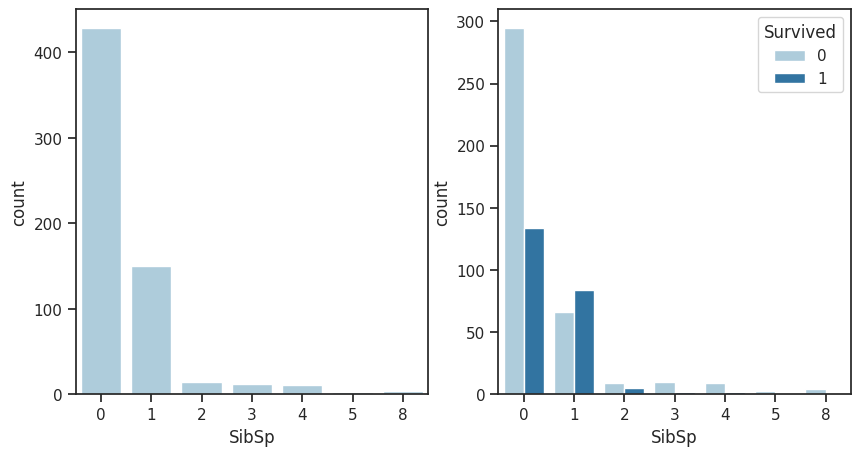

In [338]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='SibSp')
sns.countplot(data=X_train, x='SibSp', hue=y_train)

These plots illustrate the relationship between the number of siblings/spouses aboard (SibSp) and survival.

- **Left Plot**:
  - The left plot shows the count of passengers based on the number of siblings/spouses aboard.
  - Most passengers traveled without any siblings or spouses, followed by a smaller number who had one sibling or spouse.
  - The count decreases as the number of siblings/spouses increases.

- **Right Plot**:
  - The right plot displays the survival rate of passengers categorized by the number of siblings/spouses aboard.
  - Passengers with no siblings/spouses (SibSp = 0) had both the highest count and the highest number of survivors.
  - As the number of siblings/spouses increases, the survival rate generally decreases.
  - Passengers with one sibling or spouse (SibSp = 1) had a relatively higher survival rate compared to others with more siblings/spouses.

Overall, these plots suggest that passengers with fewer siblings/spouses had a higher chance of survival, while those with more siblings/spouses had lower survival rates.

<Axes: xlabel='Parch', ylabel='count'>

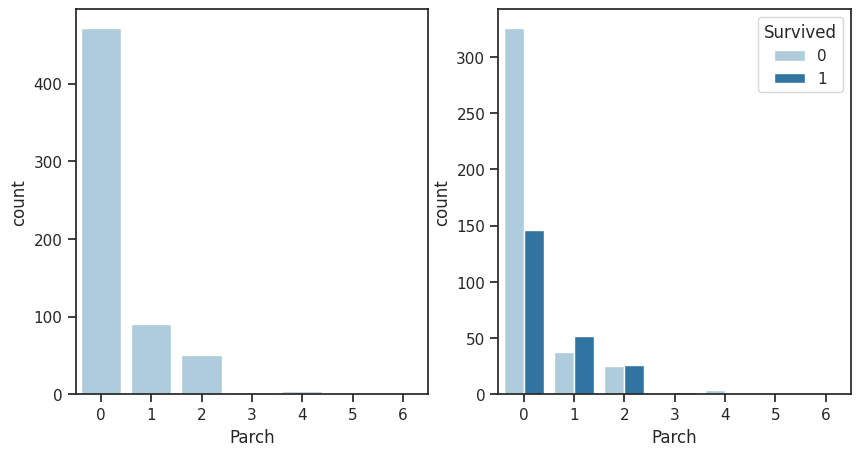

In [339]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='Parch')
sns.countplot(data=X_train, x='Parch', hue=y_train)

These plots depict the relationship between the number of parents/children aboard (Parch) and survival.

- **Left Plot**:
  - The left plot shows the count of passengers based on the number of parents/children aboard.
  - The majority of passengers traveled without any parents or children, followed by a smaller number who had one parent or child.
  - As the number of parents/children increases, the count decreases.

- **Right Plot**:
  - The right plot displays the survival rate of passengers categorized by the number of parents/children aboard.
  - Passengers with no parents or children (Parch = 0) had both the highest count and the highest number of survivors.
  - As the number of parents/children increases, the survival rate generally decreases.
  - Passengers with one or two parents or children (Parch = 1 or 2) had relatively higher survival rates compared to those with more parents or children.

In summary, passengers with fewer parents or children aboard had a higher chance of survival, while those with more parents or children had lower survival rates.

Let's also examine the number of survivals based on the Fares.

<Axes: xlabel='FareGroup', ylabel='Survived'>

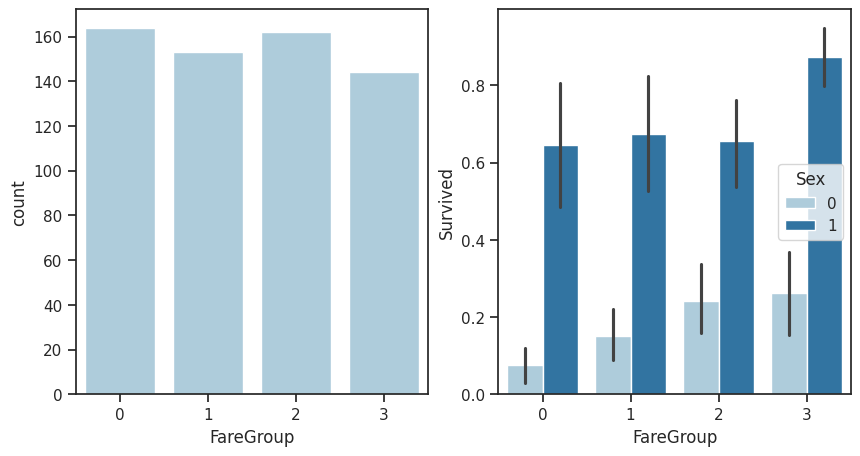

In [340]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(ax=axes[0], data=X_train,x='FareGroup')
sns.barplot(ax=axes[1], data=X_train,x="FareGroup",y=y_train, hue='Sex')

These plots illustrate the relationship between the fare group (FareGroup) and survival, with additional insight based on gender (Sex).

- **Left Plot**:
  - The left plot shows the distribution of passengers across different fare groups.
  - FareGroup 0 represents passengers with the lowest fares, while FareGroup 3 represents passengers with the highest fares.
  - The majority of passengers belong to FareGroup 0, indicating that most passengers had lower fares.
  - As the fare group increases, the count of passengers decreases, indicating fewer passengers with higher fares.

- **Right Plot**:
  - The right plot displays the survival rate of passengers categorized by fare groups.
  - Passengers in FareGroup 3, representing those with the highest fares, had the highest survival rate among all fare groups.
  - As the fare group decreases, the survival rate tends to decrease as well.
  - Additionally, the plot is further differentiated by gender (Sex), showing that females generally had higher survival rates across all fare groups compared to males.

In summary, passengers with higher fares had a higher chance of survival, and females tended to have higher survival rates regardless of fare group.

## Logistic Regression


Test score: 0.7761
       Feature  Coefficient
0        Title    -1.071258
1       Pclass    -0.735629
2         IsMr    -0.297559
3        SibSp    -0.234210
4     AgeGroup    -0.208164
5     Embarked     0.068823
6   FamilySize    -0.043038
7          Sex     0.000000
8        Parch     0.000000
9    IsElderly     0.000000
10     IsAlone     0.000000
11   FareGroup     0.000000


Training set accuracy: 0.8330658105939005
Accuracy: 0.7761194029850746 

Confusion matrix
 [[130  23]
 [ 37  78]] 



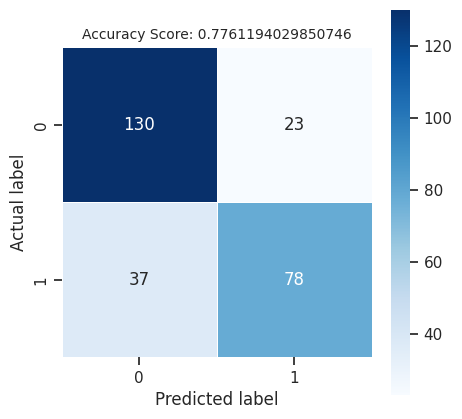

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.77      0.68      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [341]:
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Define training and test sets

X_train_model1 = X_train
y_train_model1 = y_train
X_test_model1 = X_test
y_test_model1 = y_test
CX=X_train_model1.columns

scaler = StandardScaler()
X_train_model1 = scaler.fit_transform(X_train_model1)
X_test_model1  = scaler.transform(X_test_model1 )

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=0.1,multi_class='auto',penalty='l1',solver='liblinear',max_iter=500)

# fit data
clf.fit(X_train_model1,y_train_model1)
# compute accuracy of the prediction
score = clf.score(X_test_model1,y_test_model1)
print("Test score: %.4f" % score)

# Get the coefficients of the model
coefficients_model1 = clf.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model1 = pd.DataFrame({'Feature': CX, 'Coefficient': coefficients_model1})

# Sort the coefficients to identify the most important features
coefficients_df_model1 = coefficients_df_model1 = coefficients_df_model1.reindex(coefficients_df_model1['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model1)
print("\n")

# Compute training set accuracy of model
train_accuracy_model1 = clf.score(X_train_model1, y_train_model1)

# Print training set accuracy of model
print ("Training set accuracy:", train_accuracy_model1)

# computing the accuracy
y_pred_two_digits = clf.predict(X_test_model1)
y_true_two_digits = y_test_model1
print("Accuracy:", accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
# see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
conf_mat = confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.show()

# Classification report
cr = classification_report(y_test_model1, y_pred_two_digits)
print('Classification Report:')
print(cr)


#### Precision and Recall:
<a id="precision_recall"></a>
**Recall:** Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. <br><br>
**Precision:** Means how sure is the prediction of our model that the actual label is a "Yes".

### Level of Sparcity

In [342]:
import numpy as np
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
print("Sparsity: %.2f%%" % sparsity)

Sparsity: 41.67%


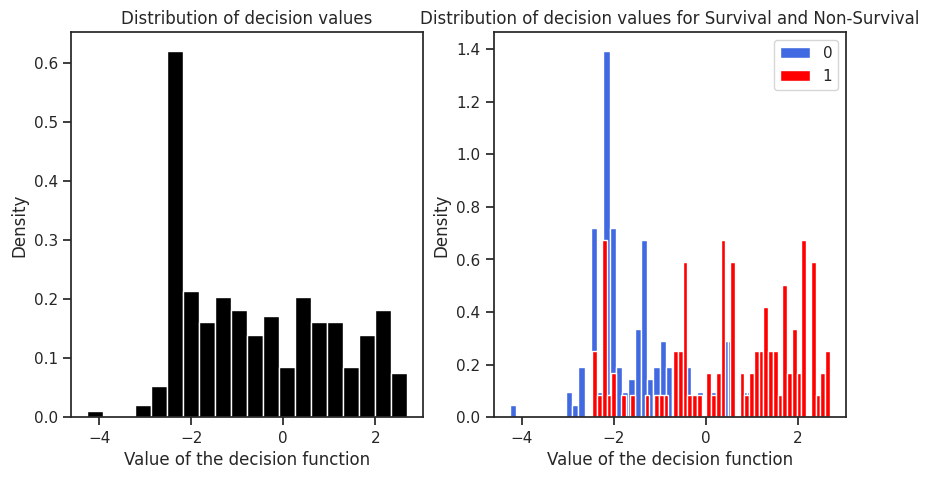

In [343]:
decision_pred_test = clf.decision_function(X_test_model1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(decision_pred_test,bins=20,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we can look at the value for the images corresponding to digit_1 and digit_2, respectively
indices_0 = np.where((y_test_model1 == 0))
decision_pred_test_0 = clf.decision_function(X_test_model1[indices_0])
indices_1 = np.where((y_test_model1 == 1))
decision_pred_test_1 = clf.decision_function(X_test_model1[indices_1])
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_0,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_1,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['0','1'])
plt.title('Distribution of decision values for Survival and Non-Survival')
plt.show()

Based on the provided plots of the distribution of decision values for a binary classification problem, we can draw several conclusions:

1. **Separability of Classes**:
   - The right plot shows that there is some degree of separation between the decision values associated with survival (class 1) and non-survival (class 0) instances. This indicates that the classifier can differentiate between the two classes to some extent based on the decision values.

2. **Confidence of Predictions**:
   - The concentration of decision values towards extreme ends (far from 0) on both plots suggests that the classifier is relatively confident in its predictions. High absolute values of decision functions often indicate strong confidence in classification.

3. **Overlap between Classes**:
   - Despite the separability observed, there is still some overlap between the decision value distributions of the two classes. This overlap implies that there are instances where the classifier struggles to make accurate predictions, leading to misclassifications.

We can also plot the distribution of prediction probabilities. These probabilities give us some indication of the confidence of the prediction.

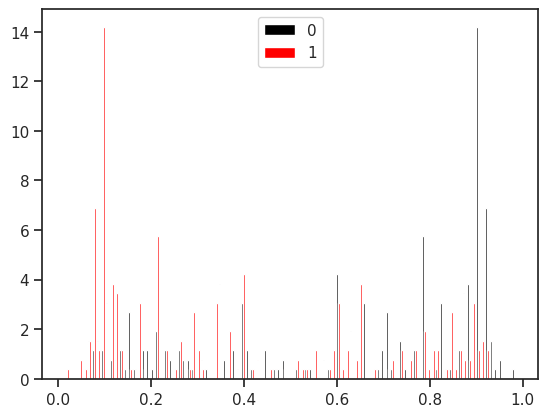

In [344]:
proba_pred_test = clf.predict_proba(X_test_model1)
plt.hist(proba_pred_test,bins=100,color=['black','red'],density=True)
# Equivalent to the following two lines
#plt.hist(proba_pred_test[:,0],bins=100,color=['black'],density=True)
#plt.hist(proba_pred_test[:,1],bins=100,color=['red'],density=True)
plt.legend(clf.classes_)
plt.show()

 **Plot Interpretation**:
   - The histogram plot shows the distribution of prediction probabilities for each class (0 and 1).
   - The x-axis represents the value of the prediction probabilities, ranging from 0 to 1.
   - The y-axis represents the density of occurrences of the prediction probabilities.
   - The black bars represent the distribution of prediction probabilities for class 0, while the red bars represent the distribution for class 1.
   - The plot provides insights into how confident the model is in its predictions for each class. Higher peaks indicate higher confidence, while broader distributions suggest more uncertainty.


### Cross Validation

In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Create Logistic Regression model
logistic_reg = LogisticRegression(max_iter=500, multi_class='auto')

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_model1, y_train_model1)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']
best_solver = best_params['solver']
best_penalty = best_params['penalty']

print("Best hyperparameters:")
print("  - C:", best_C)
print("  - Solver:", best_solver)
print("  - Penalty:", best_penalty)

Best hyperparameters:
  - C: 0.1
  - Solver: newton-cg
  - Penalty: l2


### Performance Improvement with Best Hyperparameters

Now, let us apply Logistic regression with the best hyperparameters.

Test score: 0.7799
Accuracy: 0.7798507462686567 

Confusion matrix
 [[131  22]
 [ 37  78]] 



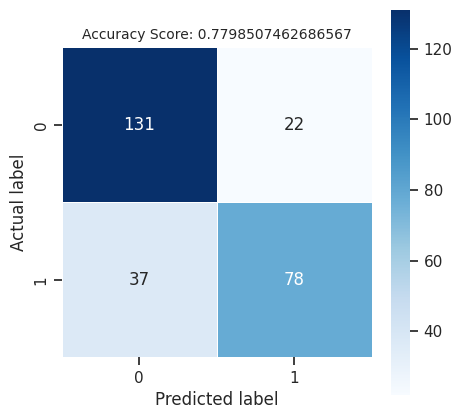

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.68      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [346]:

clf = LogisticRegression(C=0.1,multi_class='auto',penalty='l2',solver='newton-cg',max_iter=500)
# fit data
clf.fit(X_train_model1,y_train_model1)
# compute accuracy of the prediction
score = clf.score(X_test_model1,y_test_model1)
print("Test score: %.4f" % score)

# computing the accuracy
y_pred_two_digits = clf.predict(X_test_model1)
y_true_two_digits = y_test_model1
print("Accuracy:", accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
conf_mat = confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.show()

# Classification report
cr = classification_report(y_test_model1, y_pred_two_digits)
print('Classification Report:')
print(cr)


We observe that the test accuracy score has improved as expected but the improvement has been almost negligible.

### ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between the survived (True Positives) and non-survived. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

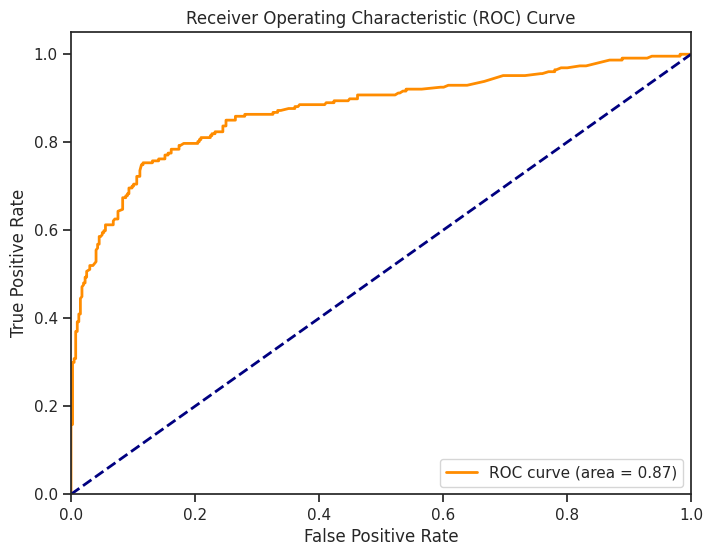

In [347]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(clf, X_train_model1, y_train_model1, cv=5, method="decision_function")
# Logistic Regression Classifier
logreg_fpr, logreg_tpr, threshold = roc_curve(y_train_model1, y_scores)

# Compute Area Under the Curve (AUC)
roc_auc = auc(logreg_fpr, logreg_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


- The x-axis, representing the False Positive Rate (FPR), indicates the proportion of passengers who were predicted to survive but did not, relative to all passengers who did not survive.
- The y-axis, representing the True Positive Rate (TPR), signifies the proportion of passengers who were correctly predicted to survive relative to all passengers who did survive.
- The orange line, denoting the ROC curve, illustrates the model's performance across different classification thresholds. It shows how the trade-off between TPR and FPR changes as the threshold for classifying a passenger as a survivor varies.
- The dashed blue line represents the diagonal line, indicating random guessing. A model with no predictive capability would fall along this line.
- The area under the ROC curve (AUC), mentioned as 0.87 in the legend, quantifies the model's discriminative ability. An AUC closer to 1 suggests better model performance in distinguishing between survivors and non-survivors.

Therefore, this ROC curve suggests that the classification model has a good ability to discriminate between passengers who survived and those who did not, with an AUC of 0.87, indicating a relatively strong performance.

## Support Vector Machines


In [348]:
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train_model2 = X_train
y_train_model2 = y_train
X_test_model2 = X_test
y_test_model2 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model2.shape)
print('Shape of train labels:',y_train_model2.shape)
print('Shape of test data:',X_test_model2.shape)
print('Shape of test labels:',y_test_model2.shape)

# Store the feature names in a new variable
CX=X_train_model2.columns

# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
scaler = StandardScaler()
X_train_model2 = scaler.fit_transform(X_train_model2)
X_test_model2  = scaler.transform(X_test_model2 )



Shape of train data (623, 12)
Shape of train labels: (623,)
Shape of test data: (268, 12)
Shape of test labels: (268,)


### Training SVM on this database
The parameter C is in factor of the penalty term arising from misclassification. A large value of C aims at classifying all training examples correctly. Various kernels can be used: "linear" (default choice), "rbf" (Gaussians), "poly" (polynomials), "sigmoid". Custom kernels could also be defined.

We start by using SVM with some parameters set to default values.
From the documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html on the function svm.SVC(), it appears that  𝐶=1.0
  and kernel='rbf' by default.

In [349]:
binary_classifier = svm.SVC()
C_values = np.logspace(-1, 4, 6)

train_accuracy = []
test_accuracy = []

for C_chosen in C_values:
    # construct the classifier with given value of C and fit it
    binary_classifier = svm.SVC(C=C_chosen)
    binary_classifier.fit(X_train_model2,y_train_model2)
    # compute the training error for the 0-1 loss
    y_pred_two_digits = binary_classifier.predict(X_train_model1)
    train_score = accuracy_score(y_true=y_train_model2, y_pred=y_pred_two_digits)
    train_accuracy.append(train_score)
    # compute the validation error for the 0-1 loss
    y_pred_two_digits = binary_classifier.predict(X_test_model2)
    y_true_two_digits = y_test_model2
    test_score = accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits)
    test_accuracy.append(test_score)
    print('C =',C_chosen,': test accuracy =',test_score)


C = 0.1 : test accuracy = 0.7835820895522388
C = 1.0 : test accuracy = 0.7798507462686567
C = 10.0 : test accuracy = 0.7798507462686567
C = 100.0 : test accuracy = 0.7686567164179104
C = 1000.0 : test accuracy = 0.7686567164179104
C = 10000.0 : test accuracy = 0.7686567164179104


We can plot the test accuracy as a function of the value of  𝐶
  (at this stage we are not choosing the value of  𝐶
 , as this would require performing some cross validation with the training set).

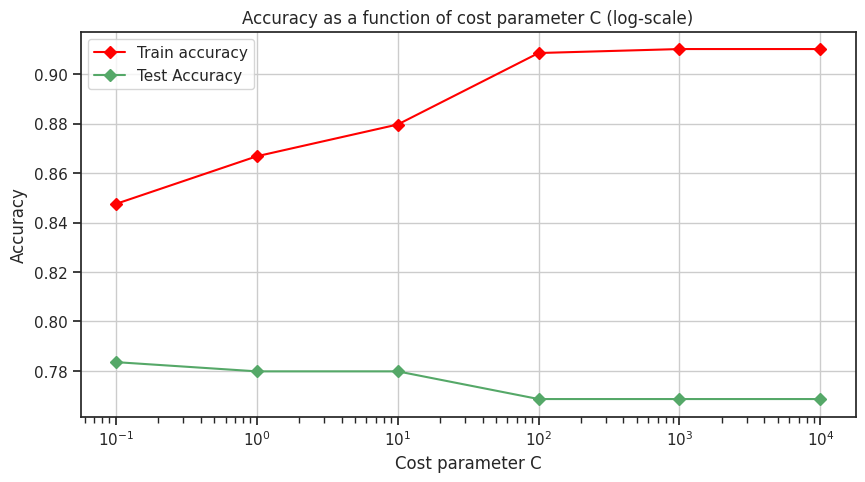

In [350]:
plt.figure(figsize=(10, 5))
plt.semilogx(C_values, train_accuracy,'-gD' ,color='red' , label="Train accuracy")
plt.semilogx(C_values, test_accuracy,'-gD' , label="Test Accuracy")
plt.grid(True)
plt.xlabel("Cost parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy as a function of cost parameter C (log-scale)')
plt.show()

This plot likely represents the accuracy of a machine learning model as a function of the cost parameter C, possibly in the context of a support vector machine (SVM) classifier.

1. **Accuracy as a Function of Cost Parameter C**:
   - The x-axis represents the cost parameter C, which is used in SVM models to control the trade-off between maximizing the margin and minimizing the classification error.
   - The x-axis is plotted on a logarithmic scale, since the values of C are exponentially increasing.
   - The y-axis represents the accuracy of the model, which is the proportion of correctly classified instances.
   - The red line with diamond markers represents the training accuracy, showing how well the model performs on the training dataset as C varies.
   - The green line with square markers represents the test accuracy, showing how well the model generalizes to unseen data.
   - As C increases (moving towards the right on the x-axis), the model becomes more prone to overfitting on the training data, leading to higher training accuracy but potentially lower test accuracy.
   - Conversely, as C decreases (moving towards the left on the x-axis), the model becomes more prone to underfitting, leading to lower training accuracy but potentially higher test accuracy.
   - The plot helps in identifying an optimal value of C that balances model complexity and generalization performance.

Overall, this plot is useful for understanding how the choice of the cost parameter C affects the performance of the SVM model in terms of accuracy.

### Understanding and visualizing what SVM does
We also have a closer look at the outputs for a given value of  𝐶
 , in particular the various coefficients, in order to understand the decision function. We consider the case of a linear kernel, which leads to more interpretable results.

Accuracy: 0.7723880597014925 

Confusion matrix
 [[129  24]
 [ 37  78]] 



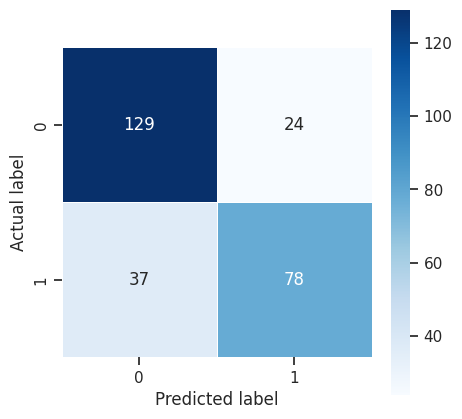

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [351]:
binary_classifier = svm.SVC(C=1,kernel="linear")
binary_classifier.fit(X_train_model2,y_train_model2)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# computing the accuracy
y_pred_two_digits = binary_classifier.predict(X_test_model2)
y_true_two_digits = y_test_model2
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
conf_mat = metrics.confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
cr = classification_report(y_test_model2, y_pred_two_digits)
print('Classification Report:')
print(cr)


### Cross Validation

In [352]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}

# Perform cross-validation and hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_model2, y_train_model2)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


Let us now perform SVM with the best parameters and see the accuracy.

Accuracy: 0.7835820895522388 

Confusion matrix
 [[135  18]
 [ 40  75]] 



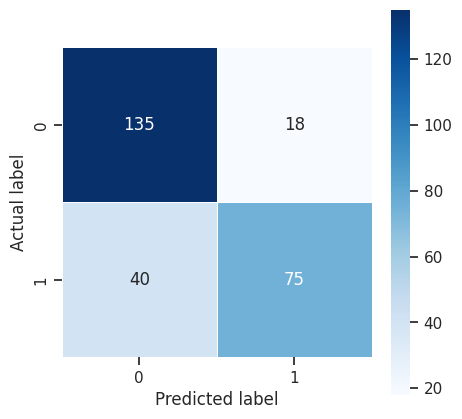

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



In [353]:
binary_classifier = svm.SVC(C=0.1,kernel="rbf", gamma="scale")
binary_classifier.fit(X_train_model2,y_train_model2)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# computing the accuracy
y_pred_two_digits = binary_classifier.predict(X_test_model2)
y_true_two_digits = y_test_model2
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
conf_mat = metrics.confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
cr = classification_report(y_test_model2, y_pred_two_digits)
print('Classification Report:')
print(cr)

Again, we observe that the test accuracy score has improved as expected but the improvement has been almost negligible.

### Histogram of Decision Function Values for each Output Value

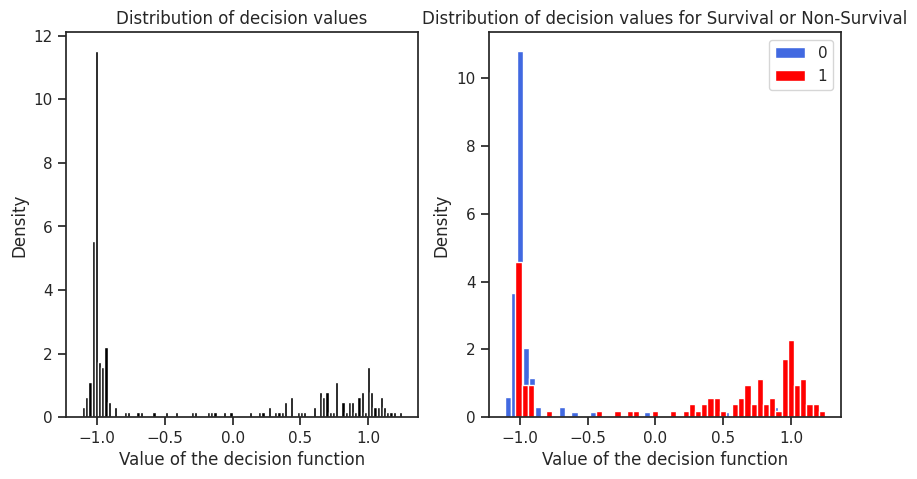

In [354]:
decision_pred_test = binary_classifier.decision_function(X_test_model2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# we first plot the values of the decision function for all data points
plt.hist(decision_pred_test,bins=100,color='black',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.title('Distribution of decision values')
# we next look at the values for the images corresponding to 0(non-survival) and 1(survival), respectively
indices_0 = np.where((y_test_model2 == 0))
decision_pred_test_1 = binary_classifier.decision_function(X_test_model2[indices_0])
indices_1 = np.where((y_test_model2 == 1))
decision_pred_test_2 = binary_classifier.decision_function(X_test_model2[indices_1])
plt.subplot(1, 2, 2)
plt.hist(decision_pred_test_1,bins=50,color='royalblue',density=True)
plt.hist(decision_pred_test_2,bins=50,color='red',density=True)
plt.xlabel("Value of the decision function")
plt.ylabel("Density")
plt.legend(['0','1'])
plt.title('Distribution of decision values for Survival or Non-Survival')
plt.show()

These plots represent the distribution of decision values generated by the model.

1. **Distribution of Decision Values (Left)**:
   - This plot shows the overall distribution of decision values generated by the classification model.
   - The x-axis represents the value of the decision function, which could range from -1 to 1.
   - The y-axis represents the density of data points, indicating how frequently each decision value occurs.
   - It appears that decision values are concentrated around certain values, with some variability in density.

2. **Distribution of Decision Values for Survival or Non-Survival (Right)**:
   - This plot further breaks down the distribution of decision values based on the actual class labels (survival or non-survival).
   - The x-axis still represents the value of the decision function, while the y-axis represents the density of data points.
   - Data points are color-coded by class label: blue for non-survival (0) and red for survival (1).
   - The plot shows the distribution of decision values separately for survivors and non-survivors. It provides insights into how decision values are distributed differently for each class.


We next investigate the support vectors.

In [355]:
print('Number of support vectors for each class:')
print(' - for',0,': ',binary_classifier.n_support_[0])
print(' - for',1,': ',binary_classifier.n_support_[1],'\n')
indices = binary_classifier.support_# (indices of the support vectors)
decision_values = binary_classifier.decision_function(binary_classifier.support_vectors_) # (values of the decision function for the support vectors)
print('Some support vectors')

num_samples_to_print = 5  # Number of support vectors to print
for i in range(min(num_samples_to_print, len(indices))):
    idx = indices[i]
    decision_value = decision_values[i]
    print(f'Support vector {i + 1}: Index {idx}, Decision value {decision_value}')

Number of support vectors for each class:
 - for 0 :  178
 - for 1 :  171 

Some support vectors
Support vector 1: Index 0, Decision value 0.9705361092244907
Support vector 2: Index 5, Decision value 0.5906979888220557
Support vector 3: Index 7, Decision value -0.9435405143768232
Support vector 4: Index 9, Decision value 0.44353693772479585
Support vector 5: Index 12, Decision value 0.4716884587684286


### Performing SVM after a PCA
We next perform a PCA, to reduce the dimensionality of the inputs to two variables, and then perform SVM in this reduced space. One can however increase the number of retained PCA dimensions until the accuracy on the predictions is nearly as good as with the full features.

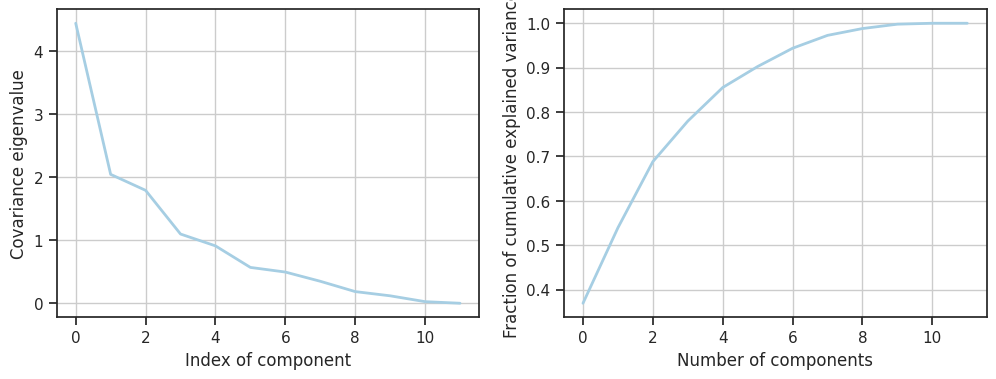

In [356]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 12
pca_data = pca.fit_transform(X_train_model2)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
ax1.plot(pca.explained_variance_, linewidth=2)
ax1.grid()
ax1.set_xlabel('Index of component')
ax1.set_ylabel('Covariance eigenvalue')
ax2.plot(cum_var_explained, linewidth=2)
ax2.grid()
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Fraction of cumulative explained variance')
plt.show()

These plots likely represent the results of performing Principal Component Analysis (PCA) on some dataset.

1. **Covariance Eigenvalue Plot (Left)**:
   - This plot shows the eigenvalues of the covariance matrix corresponding to each principal component. Eigenvalues represent the variance of the data along each principal component axis.
   - The index of the component is plotted on the x-axis, while the covariance eigenvalue is plotted on the y-axis.
   - Typically, eigenvalues are sorted in descending order. The plot shows a rapid decrease in eigenvalues, indicating that the variance explained by each subsequent principal component decreases.

2. **Fraction of Cumulative Explained Variance Plot (Right)**:
   - This plot shows the fraction of cumulative explained variance as the number of principal components increases.
   - The x-axis represents the number of components, while the y-axis represents the fraction of cumulative explained variance.
   - As more principal components are included, the cumulative explained variance increases. The plot typically exhibits an increasing trend, showing that adding more components captures more variance in the data.
   - The plot can help determine how many principal components are needed to retain a certain amount of variance in the data.


In [357]:
for i in range(0,len(cum_var_explained),1):
  print('Fraction of explained variance for dimension:',i+1,"=",cum_var_explained[i])

Fraction of explained variance for dimension: 1 = 0.3693589465658696
Fraction of explained variance for dimension: 2 = 0.539365804036251
Fraction of explained variance for dimension: 3 = 0.6883061361675997
Fraction of explained variance for dimension: 4 = 0.7796022697279381
Fraction of explained variance for dimension: 5 = 0.8552917899779662
Fraction of explained variance for dimension: 6 = 0.9025632802389845
Fraction of explained variance for dimension: 7 = 0.9437148674897247
Fraction of explained variance for dimension: 8 = 0.9727105368770499
Fraction of explained variance for dimension: 9 = 0.9880823065653318
Fraction of explained variance for dimension: 10 = 0.9978995152674262
Fraction of explained variance for dimension: 11 = 1.0000000000000002
Fraction of explained variance for dimension: 12 = 1.0000000000000002


Since we know that having 7 components explains almost 95% of the data, thus we take the number of components to be 7 in the next code.We transform both outputs into 2 dimensional vectors for plotting, by keeping some PCA components.

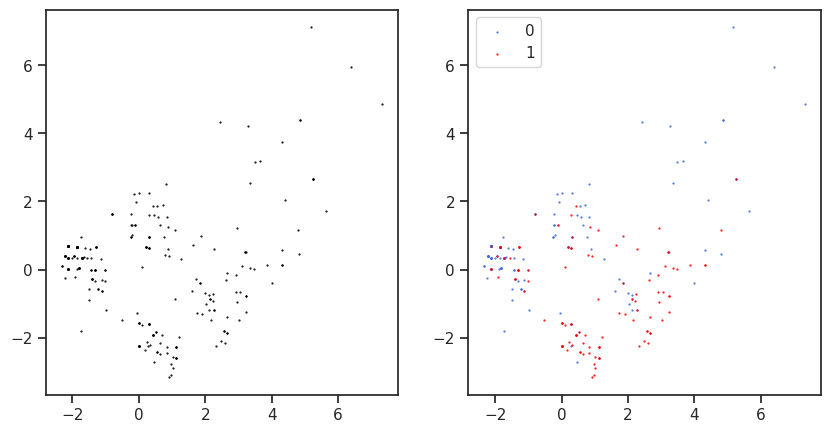

In [358]:
# indices of PCA components to plot
pca.n_components = 7
component_1 = 0
component_2 = 1
indices_0 = np.where((y_test_model2 == 0))
indices_1 = np.where((y_test_model2 == 1))

pca.fit(X_train_model2)
score_train = pca.transform(X_train_model2)
score_test = pca.transform(X_test_model2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(score_test[:,component_1],score_test[:,component_2],s=0.3,color='black')
plt.subplot(1, 2, 2)
score_test_0 = pca.transform(X_test_model2[indices_0])
score_test_1 = pca.transform(X_test_model2[indices_1])
plt.scatter(score_test_0[:,component_1],score_test_0[:,component_2],s=0.3,color='royalblue')
plt.scatter(score_test_1[:,component_1],score_test_1[:,component_2],s=0.3,color='red')
plt.legend(['0','1'])
plt.show()

 One can test the quality of the results depending on the chosen kernel. Here we choose the 'linear' kernel. But later we will do some cross validation to find the optimal 'kernel'.

accuracy (on train data): 0.8170144462279294
accuracy (on test data) : 0.7686567164179104 

Accuracy: 0.7686567164179104 

Confusion matrix
 [[131  22]
 [ 40  75]] 



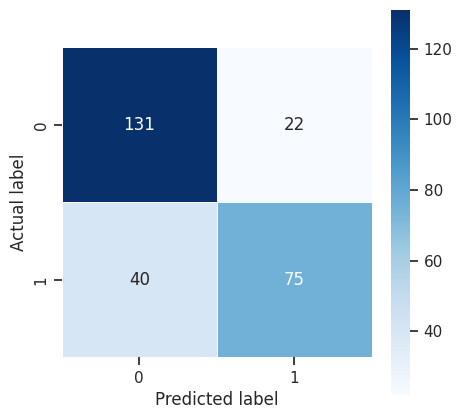

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.77      0.65      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [359]:
binary_classifier_PCA = svm.SVC(C=10,kernel="linear")
binary_classifier_PCA.fit(score_train,y_train_model2)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train_model2,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test_model2,y_pred=y_test_PCA), "\n")

# computing the accuracy
y_pred_two_digits = y_test_PCA
y_true_two_digits = y_test_model2
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
conf_mat = metrics.confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
cr = classification_report(y_test_model2, y_pred_two_digits)
print('Classification Report:')
print(cr)

### Cross Validation

In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}

# Perform cross-validation and hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(score_train,y_train_model2)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


accuracy (on train data): 0.8571428571428571
accuracy (on test data) : 0.7723880597014925 

Accuracy: 0.7723880597014925 

Confusion matrix
 [[135  18]
 [ 43  72]] 



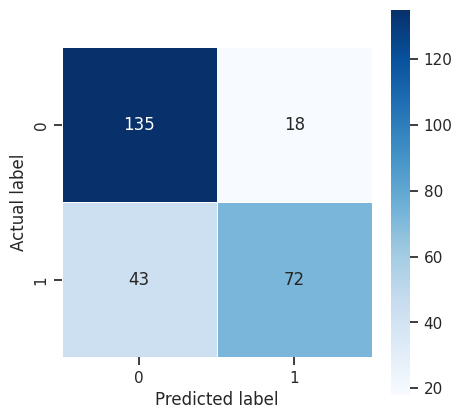

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268



In [361]:
binary_classifier_PCA = svm.SVC(C=1,kernel="rbf",gamma="scale")
binary_classifier_PCA.fit(score_train,y_train_model2)
y_train_PCA = binary_classifier_PCA.predict(score_train)
y_test_PCA = binary_classifier_PCA.predict(score_test)
print("accuracy (on train data):", metrics.accuracy_score(y_true=y_train_model2,y_pred=y_train_PCA))
print("accuracy (on test data) :", metrics.accuracy_score(y_true=y_test_model2,y_pred=y_test_PCA), "\n")

# computing the accuracy
y_pred_two_digits = y_test_PCA
y_true_two_digits = y_test_model2
print("Accuracy:", metrics.accuracy_score(y_true=y_true_two_digits, y_pred=y_pred_two_digits), "\n")

# computing the confusion matrix
conf_mat = metrics.confusion_matrix(y_true=y_true_two_digits, y_pred=y_pred_two_digits, labels=[0,1])
print("Confusion matrix\n",conf_mat,"\n")
# Create a heatmap of the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification report
cr = classification_report(y_test_model2, y_pred_two_digits)
print('Classification Report:')
print(cr)

We next plot the level sets of the decision function for the values -1,0 and 1.

### ROC Curve

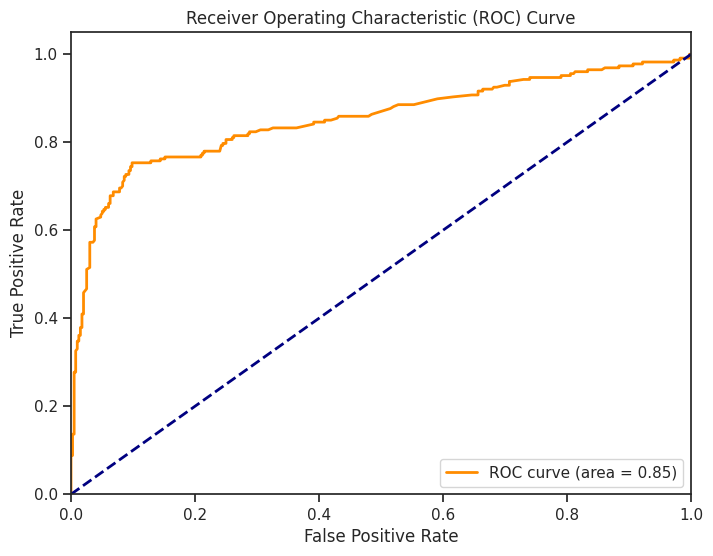

In [362]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(binary_classifier_PCA, X_train_model2, y_train_model2, cv=5, method="decision_function")
# SVM Classifier
svm_fpr, svm_tpr, threshold = roc_curve(y_train_model2, y_scores)

# Compute Area Under the Curve (AUC)
roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This plot appears to be a Receiver Operating Characteristic (ROC) curve.
- In this case, the AUC is 0.85, indicating that the classifier has good discriminative ability.
- Overall, this ROC curve suggests that the classifier performs reasonably well in distinguishing between the two classes, with a high true positive rate and a relatively low false positive rate across different threshold values.

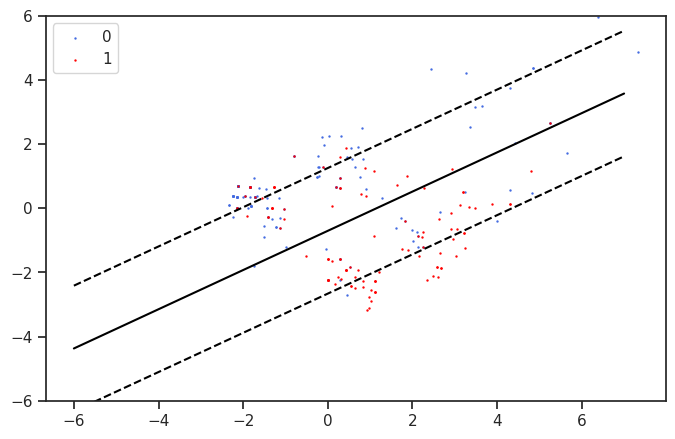

In [363]:
binary_classifier_PCA = svm.SVC(C=10,kernel="linear",gamma="scale")
binary_classifier_PCA.fit(score_train,y_train_model2)
#-- plot first the scatter plot of the data set
plt.figure(figsize=(8, 5))
score_test_0 = pca.transform(X_test_model2[indices_0])
score_test_1 = pca.transform(X_test_model2[indices_1])
plt.scatter(score_test_0[:,component_1],score_test_0[:,component_2],s=0.5,color='royalblue')
plt.scatter(score_test_1[:,component_1],score_test_1[:,component_2],s=0.5,color='red')
plt.legend(['0','1'])
#-- plot next the required isolines --
w = binary_classifier_PCA.coef_[0]
b = binary_classifier_PCA.intercept_
# isoline 0 of the decision function: equation w1*x1 + w2*x2 + b = 0, so x2 = -(w1*x1+b)/w2
x1 = np.linspace(-6,7,20)
x2 = -(w[0]*x1+b)/w[1]
plt.plot(x1,x2,color='black')
# isoline -1 of the decision function: equation w1*x1 + w2*x2 + b = -1, so x2 = -(w1*x1+b)/w2
x2 = -(w[0]*x1+b+1)/w[1]
plt.plot(x1,x2,color='black',linestyle='dashed')
# isoline 1 of the decision function: equation w1*x1 + w2*x2 + b = 1, so x2 = -(w1*x1+b)/w2
x2 = -(w[0]*x1+b-1)/w[1]
plt.plot(x1,x2,color='black',linestyle='dashed')
plt.ylim((-6,6))
plt.show()


1. **Scatter Plot**:
   - The scatter plot visualizes the transformed test data after PCA, with each point representing an instance.
   - Instances belonging to class 0(non-survival) are plotted in blue, while those belonging to class 1(survival) are plotted in red.

3. **Decision Boundaries**:
   - The solid black line represents the decision boundary of the SVM classifier. It separates the data points into two classes based on the learned decision function.
   - The dashed black lines represent the margins around the decision boundary. These lines are equidistant from the decision boundary and act as the maximum-margin hyperplanes.
   - The dotted black lines represent the support vectors, which are the data points closest to the decision boundary. They determine the position of the decision boundary.

4. **Isolines**:
   - Isolines at 0, -1, and 1 of the decision function are plotted to illustrate the decision boundary and margins in the feature space.
   - These isolines help visualize how the decision function separates the data points into different classes.

Thus, the plot demonstrates the effectiveness of the SVM classifier in separating the data points into two classes based on the decision boundary learned from the training data.


## Decision Trees

In [364]:
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train_model3 = X_train
y_train_model3 = y_train
X_test_model3 = X_test
y_test_model3 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model3.shape)
print('Shape of train labels:',y_train_model3.shape)
print('Shape of test data:',X_test_model3.shape)
print('Shape of test labels:',y_test_model3.shape)

# Store the feature names in a new variable
CX=X_train_model3.columns

# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
scaler = StandardScaler()
X_train_model3 = scaler.fit_transform(X_train_model3)
X_test_model3  = scaler.transform(X_test_model3 )


Shape of train data (623, 12)
Shape of train labels: (623,)
Shape of test data: (268, 12)
Shape of test labels: (268,)


We start by performing classification with a single tree.

In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

The key parameters to avoid overfitting are
- *max_depth* to limit the maximal depth of the tree
- *min_samples_leaf* to ask for a minimal number of data points for a condition to be satisfied
We start by playing around with a few values of these parameters to get a feeling of what is done/obtained.

Accuracy: 0.7761194029850746
Confusion Matrix:
[[138  15]
 [ 45  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.82      0.61      0.70       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



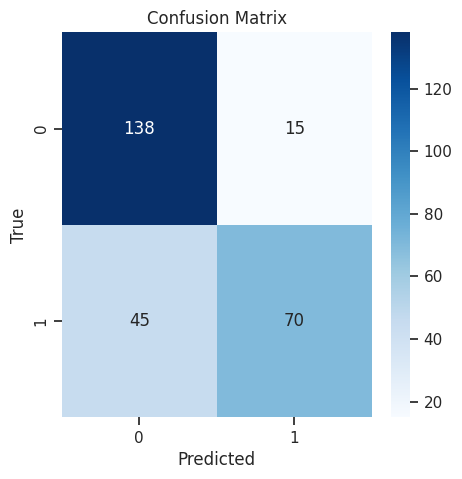

In [366]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# choice of parameters
chosen_max_depth = 7
chosen_min_samples_leaf = 2

# constructing + fitting the model and making the prediction
dt = DecisionTreeClassifier(max_depth=chosen_max_depth, min_samples_leaf=chosen_min_samples_leaf)
model = dt.fit(X_train_model3,y_train_model3)
y_pred = model.predict(X_test_model3)

# Computing the performance on the test set
# Accuracy score
accuracy = accuracy_score(y_test_model3, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_model3, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
cr = classification_report(y_test_model3, y_pred)
print('Classification Report:')
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We can use plot_tree to visualize what was learned.

Number of data points :  623
X[ 0 ] =  Pclass
X[ 1 ] =  Sex
X[ 2 ] =  SibSp
X[ 3 ] =  Parch
X[ 4 ] =  Embarked
X[ 5 ] =  Title
X[ 6 ] =  IsMr
X[ 7 ] =  AgeGroup
X[ 8 ] =  IsElderly
X[ 9 ] =  FamilySize
X[ 10 ] =  IsAlone
X[ 11 ] =  FareGroup


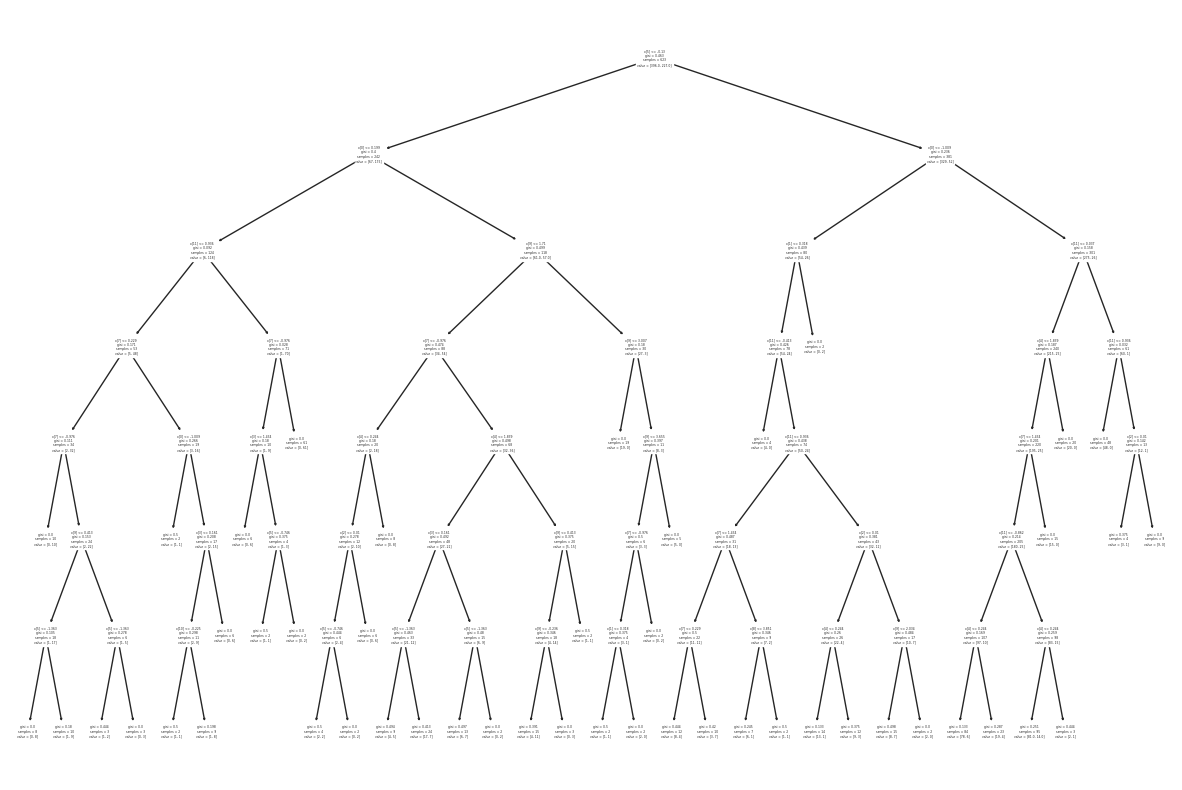

In [367]:
from sklearn import tree
print('Number of data points : ',y_train_model3.shape[0])
for pair in zip(CX, np.arange(X_train_model3.shape[0])):
  print('X[',pair[1],'] = ', pair[0])
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)
plt.show()

### Cross Validation
We next explore more systematically the choice of the parameters by cross validation.

In [368]:
dt = DecisionTreeClassifier()
param_grid = {'max_depth':np.arange(1,35),'min_samples_leaf':np.arange(5,50)}

# Perform cross-validation and hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train_model3,y_train_model3)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 11}


### Performance Improvement with Best parameters

Accuracy: 0.7798507462686567
Confusion Matrix:
[[139  14]
 [ 45  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       153
           1       0.83      0.61      0.70       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.79      0.78      0.77       268



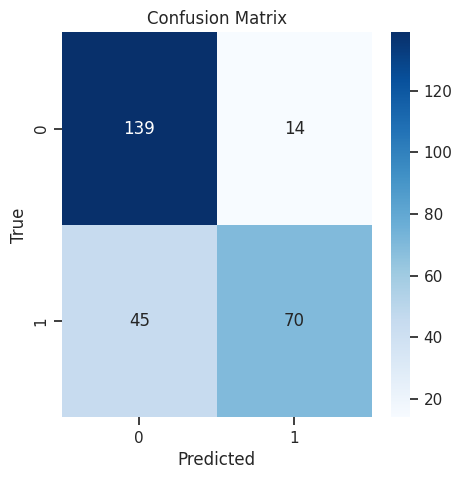

In [369]:
# choice of parameters
chosen_max_depth,chosen_min_samples_leaf = grid_search.best_params_['max_depth'],grid_search.best_params_['min_samples_leaf']

# constructing + fitting the model and making the prediction
dt = DecisionTreeClassifier(max_depth=chosen_max_depth, min_samples_leaf=chosen_min_samples_leaf)
model = dt.fit(X_train_model3,y_train_model3)
y_pred = model.predict(X_test_model3)

# Computing the performance on the test set
# Accuracy score
accuracy = accuracy_score(y_test_model3, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_model3, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
cr = classification_report(y_test_model3, y_pred)
print('Classification Report:')
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We again observe only a slight improvement.

Number of data points :  623
X[ 0 ] =  Pclass
X[ 1 ] =  Sex
X[ 2 ] =  SibSp
X[ 3 ] =  Parch
X[ 4 ] =  Embarked
X[ 5 ] =  Title
X[ 6 ] =  IsMr
X[ 7 ] =  AgeGroup
X[ 8 ] =  IsElderly
X[ 9 ] =  FamilySize
X[ 10 ] =  IsAlone
X[ 11 ] =  FareGroup


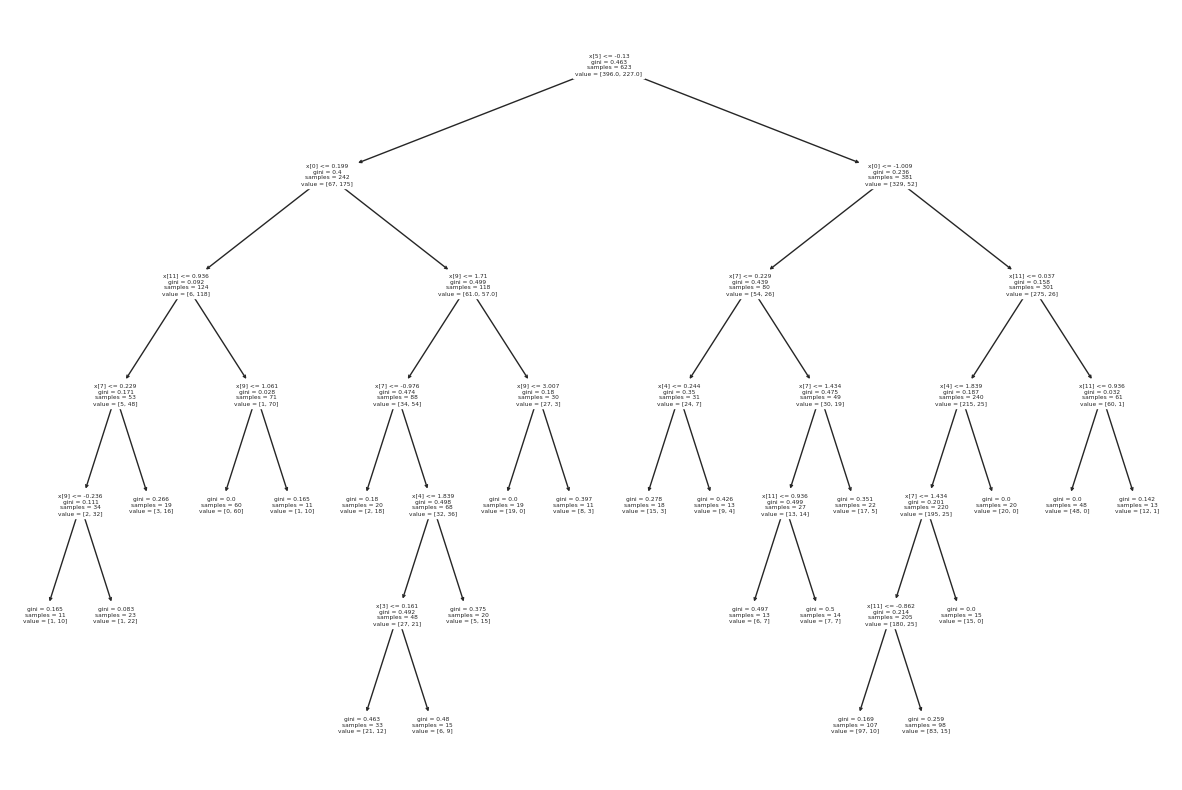

In [370]:
from sklearn import tree
print('Number of data points : ',y_train_model3.shape[0])
for pair in zip(CX, np.arange(X_train_model3.shape[0])):
  print('X[',pair[1],'] = ', pair[0])
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)
plt.show()

## Random Forest
The test error of decision trees alone is not good. It is much better to combine classification trees into random forest

In [371]:
rf = RandomForestClassifier()

X_train_model4 = X_train
y_train_model4 = y_train
X_test_model4 = X_test
y_test_model4 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model4.shape)
print('Shape of train labels:',y_train_model4.shape)
print('Shape of test data:',X_test_model4.shape)
print('Shape of test labels:',y_test_model4.shape)

# Store the feature names in a new variable
CX=X_train_model4.columns

# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
scaler = StandardScaler()
X_train_model4 = scaler.fit_transform(X_train_model4)
X_test_model4  = scaler.transform(X_test_model4 )

Shape of train data (623, 12)
Shape of train labels: (623,)
Shape of test data: (268, 12)
Shape of test labels: (268,)


Here as well, we will find the best parameters for *RandomForestRegressor* by cross validation. The key parameters to set are
- *n_estimators* which is the number of trees in the forest
- *max_depth* and *min_sample_leaf* which are the same parameters as for decision trees

### Cross Validation

In [372]:
param_grid = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}
# Perform cross-validation and hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_model4,y_train_model4)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 75}


### Performance with Best Hyperparameters

Accuracy: 0.7947761194029851
Confusion Matrix:
[[135  18]
 [ 37  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.81      0.68      0.74       115

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.79      0.79       268



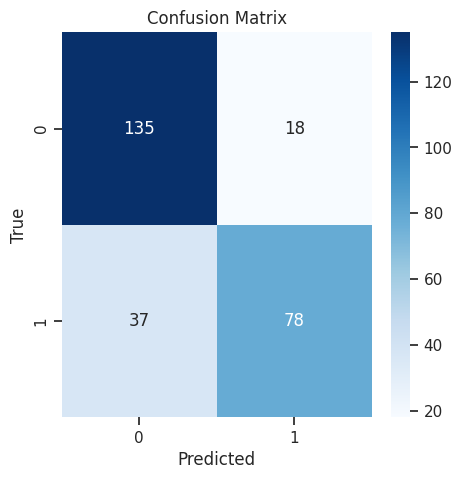

In [373]:
a,b,c=grid_search.best_params_['max_depth'],grid_search.best_params_['min_samples_leaf'],grid_search.best_params_['n_estimators']
# fitting the model with best params
RF = RandomForestClassifier(n_estimators=c,max_depth=a,min_samples_leaf=b)
model = RF.fit(X_train_model4,y_train_model4)
y_pred = model.predict(X_test_model4)

# Computing the performance on the test set
# Accuracy score
accuracy = accuracy_score(y_test_model4, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_model4, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
cr = classification_report(y_test_model4, y_pred)
print('Classification Report:')
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### ROC Curve

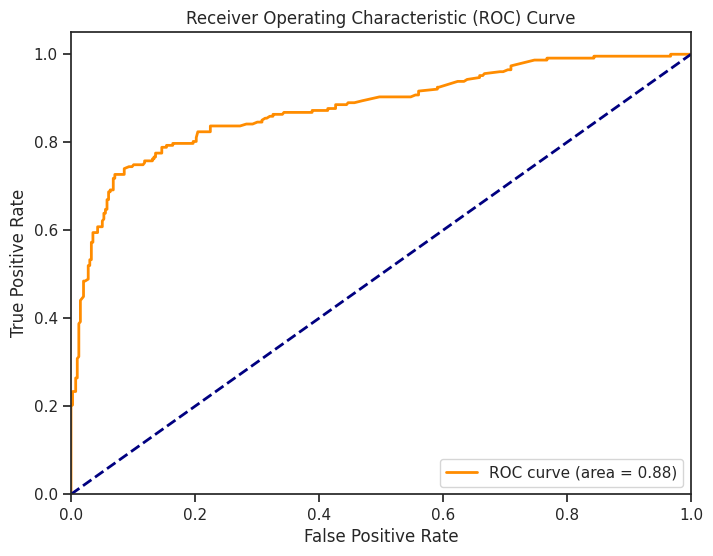

In [374]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(RF, X_train_model4, y_train_model4, cv=5, method="predict_proba")

# Get the scores for the positive class
y_scores = y_scores[:, 1]

# Random Forest Classifier
rf_fpr, rf_tpr, threshold = roc_curve(y_train_model4, y_scores)

# Compute Area Under the Curve (AUC)
roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This plot appears to be a Receiver Operating Characteristic (ROC) curve.
- In this case, the AUC is 0.88, indicating that the classifier has good discriminative ability.
- Overall, this ROC curve suggests that the classifier performs reasonably well in distinguishing between the two classes, with a high true positive rate and a relatively low false positive rate across different threshold values.

## Neural Networks

In [375]:
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np


# for modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

# set up the random number generator: given seed for reproducibility, None otherwise
# (see https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng)
my_seed = 1
rng = np.random.default_rng(seed=my_seed)

X_train_model5 = X_train
y_train_model5 = y_train
X_test_model5 = X_test
y_test_model5 = y_test

# print the shape of the training data and test data
print('Shape of train data',X_train_model5.shape)
print('Shape of train labels:',y_train_model5.shape)
print('Shape of test data:',X_test_model5.shape)
print('Shape of test labels:',y_test_model5.shape)

# Store the feature names in a new variable
CX=X_train_model5.columns

# renormalize to have data between 0 and 1; could alternatively use built-in rescaling function
scaler = StandardScaler()
X_train_model5 = scaler.fit_transform(X_train_model5)
X_test_model5  = scaler.transform(X_test_model5 )

Shape of train data (623, 12)
Shape of train labels: (623,)
Shape of test data: (268, 12)
Shape of test labels: (268,)


In [376]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X_train_model5.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_model5,
                    y_train_model5,
                    callbacks=[es],
                    epochs=200, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_1015"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2709 (Dense)                   │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2710 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2711 (Dense)                   │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6008 - loss: 0.6622 - val_accuracy: 0.7680 - val_loss: 0.5685
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7793 - loss: 0.5471 - val_accuracy: 0.8080 - val_loss: 0.4882
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.4846 - val_accuracy: 0.8160 - val_loss: 0.4473
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.4524 - val_accuracy: 0.8160 - val_loss: 0.4277
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.4337 - val_accuracy: 0.8240 - val_loss: 0.4181
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8431 - loss: 0.4206 - val_accuracy: 0.8240 - val_loss: 0.4140
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8482 - loss: 0.4096 - val_accuracy: 0.8240 - val_loss: 0.4124
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.4009 - val_accuracy: 0.8240 - 

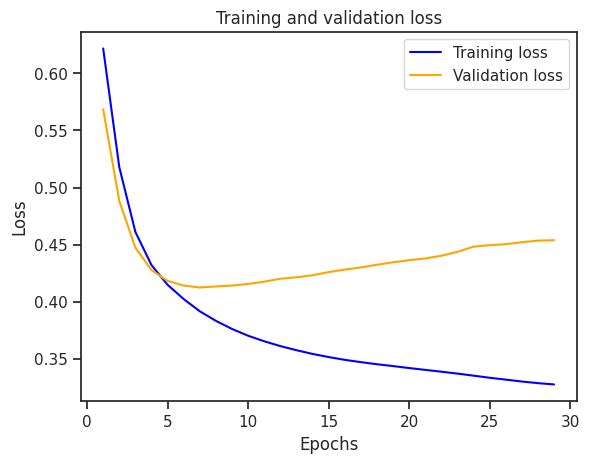

In [377]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1)

# plot
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1. **Training and Validation Loss**:
   - The blue line represents the training loss, while the orange line represents the validation loss.
   - Both lines depict how the loss changes as training progresses through multiple epochs.

2. **Epochs**:
   - The x-axis shows the number of epochs, which are complete passes through the entire training dataset.
   - As training progresses, the model adjusts its parameters to minimize the loss function, aiming to improve its predictive performance.

3. **Loss Values**:
   - The y-axis represents the loss value. Lower values indicate better performance, as they indicate that the model's predictions are closer to the actual values.
   - The decreasing trend of the training loss indicates that the model is learning from the training data and improving its performance.
   - However, the increasing trend of the validation loss suggests that the model's performance on unseen data (validation set) is deteriorating, possibly indicating overfitting.

4. **Conclusion**:
   - Initially, both training and validation losses decrease, indicating that the model is learning from the data.
   - However, after a certain point, the validation loss starts to increase while the training loss continues to decrease, suggesting that the model is overfitting to the training data and failing to generalize well to unseen data.


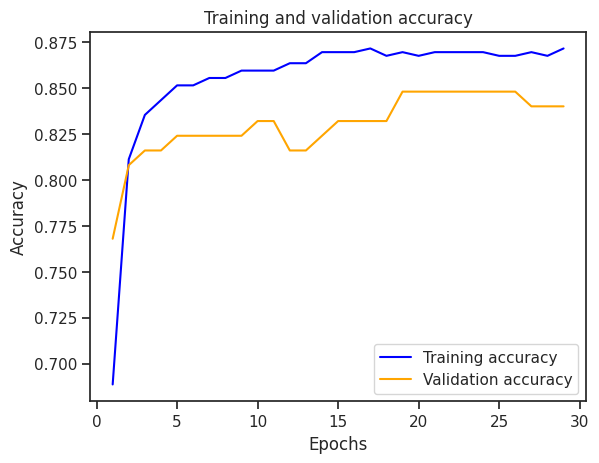

0.8479999899864197

In [378]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
plt.plot(epochs, acc, 'blue', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)


1. **Training and Validation Accuracy**:
   - The blue line represents the training accuracy, while the orange line represents the validation accuracy.
   - Both lines demonstrate how the accuracy changes as training progresses through multiple epochs.

2. **Epochs**:
   - The x-axis displays the number of epochs, which are complete passes through the entire training dataset.
   - Each epoch involves updating the model's parameters based on the training data and evaluating the performance on both training and validation sets.

3. **Accuracy Values**:
   - The y-axis represents the accuracy value, indicating the proportion of correctly classified samples.
   - The increasing trend of both training and validation accuracy suggests that the model's performance improves with training epochs.
   - However, it's noticeable that the validation accuracy seems to plateau or fluctuate after a certain number of epochs, while the training accuracy continues to increase. This discrepancy indicates potential overfitting.

4. **Conclusion**:
   - Initially, both training and validation accuracies increase, indicating that the model is learning from the data and improving its predictive performance.
   - However, the plateau or decrease in validation accuracy, while the training accuracy keeps increasing, suggests overfitting. This implies that the model may be memorizing the training data and failing to generalize well to unseen data.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.7910447761194029
Confusion Matrix:
[[139  14]
 [ 42  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       153
           1       0.84      0.63      0.72       115

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



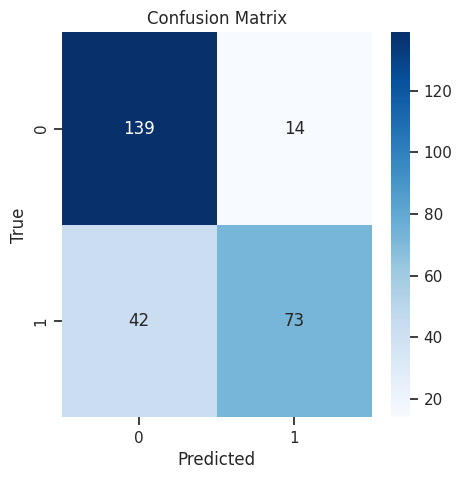

In [379]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1?
model.predict(X_train_model5) # prob of successes (survival)
np.round(model.predict(X_train_model5),0) # 1 and 0 (survival or not)
y_train_model5 # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
y_pred = np.round(model.predict(X_test_model5),0)

# Accuracy score
accuracy = accuracy_score(y_test_model5, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_model5, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
cr = classification_report(y_test_model5, y_pred)
print('Classification Report:')
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Cross Validation

#### Create a Neural Network Model
For this assignment, I've maintained a straightforward model structure. We start with an input layer containing 17 nodes, followed by a hidden layer with 8 nodes. The output layer predicts a passenger's survival.

To constrain all outputs between 0 and 1, the output layer employs a sigmoid activation function, which compresses the output range.

We'll craft a function enabling us to customize the selection of hyperparameters for the neural network. While it may appear complex at present, this approach will prove invaluable when fine-tuning our parameters later on.


In [203]:
import tensorflow as tf
from numpy.random import seed
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):

    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)

    model = Sequential()

    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))

    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))

    # add dropout, default is none
    model.add(Dropout(dr))

    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [204]:
model = create_model()
print(model.summary())

Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_343 (Dense)                    │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_344 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

None


#### Finding the best values of Epochs and Batch Size using GridSearchCV

In [205]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train_model5, y_train_model5)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   6.9s
[CV] END ...........................batch_size=16, epochs=50; total time=   4.9s
[CV] END ...........................batch_size=16, epochs=50; total time=   4.7s
[CV] END ..........................batch_size=16, epochs=100; total time=  11.7s
[CV] END ..........................batch_size=16, epochs=100; total time=   9.2s
[CV] END ..........................batch_size=16, epochs=100; total time=   9.1s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.9s
[CV] END ...........................batch_size=32, epochs=50; total time=   4.3s
[CV] END ...........................batch_size=32, epochs=50; total time=   4.3s
[CV] END ..........................batch_size=32, epochs=100; total time=   6.6s
[CV] END ..........................batch_size=32, epochs=100; total time=   7.6s
[CV] END ..........................batch_size=32,

In [206]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831437 using {'batch_size': 64, 'epochs': 100}
0.813777 (0.022897) with: {'batch_size': 16, 'epochs': 50}
0.818593 (0.014157) with: {'batch_size': 16, 'epochs': 100}
0.831421 (0.020008) with: {'batch_size': 32, 'epochs': 50}
0.821790 (0.022216) with: {'batch_size': 32, 'epochs': 100}
0.820211 (0.015030) with: {'batch_size': 64, 'epochs': 50}
0.831437 (0.014456) with: {'batch_size': 64, 'epochs': 100}


### GridSearchCV for Best Optimizer

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

epochs,batch_size=grid_result.best_params_['epochs'],grid_result.best_params_['batch_size']

# Create a KerasClassifier from the function
model = KerasClassifier(build_fn=create_model, verbose=0,epochs=epochs, batch_size=batch_size)

# Set up the parameter grid for Grid Search
param_grid = {
    'kerasclassifier__optimizer': ['sgd', 'adagrad', 'adadelta', 'adam', 'nadam'],
}

# Create a pipeline with StandardScaler and the KerasClassifier
pipeline = make_pipeline(StandardScaler(), model)

# Set up Grid Search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform Grid Search
grid_search.fit(X_train_model5, y_train_model5)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [208]:
# summarize results
print("Best: %f using %s" % (best_score, best_params))

Best: 0.831419 using {'kerasclassifier__optimizer': 'adadelta'}


### GridSearchCV for best number of Hidden Layers

In [209]:
seed(42)
tf.random.set_seed(42)
bestopt=best_params['kerasclassifier__optimizer']

# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=batch_size, verbose=0,lyrs=[8],opt=bestopt)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train_model5, y_train_model5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...........................................lyrs=[8]; total time=  13.8s
[CV] END ...........................................lyrs=[8]; total time=  13.4s
[CV] END ...........................................lyrs=[8]; total time=  11.6s
[CV] END ...........................................lyrs=[8]; total time=  11.6s
[CV] END ...........................................lyrs=[8]; total time=  11.3s
[CV] END ..........................................lyrs=[10]; total time=  13.6s
[CV] END ..........................................lyrs=[10]; total time=  15.5s
[CV] END ..........................................lyrs=[10]; total time=  12.2s
[CV] END ..........................................lyrs=[10]; total time=  11.6s
[CV] END ..........................................lyrs=[10]; total time=  10.4s
[CV] END .......................................lyrs=[10, 5]; total time=  10.9s
[CV] END .......................................l

In [210]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.629419 using {'lyrs': [10, 5]}
0.518335 (0.184230) with: {'lyrs': [8]}
0.561084 (0.184776) with: {'lyrs': [10]}
0.629419 (0.128573) with: {'lyrs': [10, 5]}
0.540116 (0.236557) with: {'lyrs': [12, 6]}
0.497123 (0.242223) with: {'lyrs': [12, 8, 4]}


### GridSearchCV for Best Drop Rate

In [211]:
lays=grid_result.best_params_['lyrs']
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=batch_size, verbose=0,dr=0.0,opt=bestopt,lyrs=lays)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train_model5, y_train_model5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=   8.1s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   7.6s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   7.8s
[CV] END ............................................dr=0.01; total time=   6.2s
[CV] END ............................................dr=0.01; total time=   7.1s
[CV] END ............................................dr=0.01; total time=   6.5s
[CV] END ............................................dr=0.01; total time=   8.2s
[CV] END ............................................dr=0.01; total time=   7.4s
[CV] END ............................................dr=0.05; total time=   6.8s
[CV] END ........................................

In [212]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.558723 using {'dr': 0.01}
0.417019 (0.140517) with: {'dr': 0.0}
0.558723 (0.167637) with: {'dr': 0.01}
0.482542 (0.185142) with: {'dr': 0.05}
0.428529 (0.124460) with: {'dr': 0.1}
0.471794 (0.186630) with: {'dr': 0.2}
0.506439 (0.244956) with: {'dr': 0.5}


### GridSearchCV for Optimal Parameters(Together(All Hyperparameters Simultaneously)-Long Computation)

In [213]:
# create model
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=batch_size, verbose=0,dr=0.0,opt='adam',lyrs=[8])

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
opti=['sgd', 'adagrad', 'adadelta', 'adam', 'nadam']

param_grid = dict(dr=drops,opt=opti,lyrs=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train_model5, y_train_model5)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END ..........................dr=0.0, lyrs=[8], opt=sgd; total time=   6.5s
[CV] END ..........................dr=0.0, lyrs=[8], opt=sgd; total time=   5.7s
[CV] END ..........................dr=0.0, lyrs=[8], opt=sgd; total time=   6.2s
[CV] END ..........................dr=0.0, lyrs=[8], opt=sgd; total time=   5.7s
[CV] END ..........................dr=0.0, lyrs=[8], opt=sgd; total time=   6.3s
[CV] END ......................dr=0.0, lyrs=[8], opt=adagrad; total time=   5.6s
[CV] END ......................dr=0.0, lyrs=[8], opt=adagrad; total time=   6.3s
[CV] END ......................dr=0.0, lyrs=[8], opt=adagrad; total time=   5.5s
[CV] END ......................dr=0.0, lyrs=[8], opt=adagrad; total time=   6.5s
[CV] END ......................dr=0.0, lyrs=[8], opt=adagrad; total time=   7.0s
[CV] END .....................dr=0.0, lyrs=[8], opt=adadelta; total time=   7.0s
[CV] END .....................dr=0.0, lyrs=[8]

In [214]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836271 using {'dr': 0.2, 'lyrs': [12, 8, 4], 'opt': 'sgd'}
0.829806 (0.036888) with: {'dr': 0.0, 'lyrs': [8], 'opt': 'sgd'}
0.654916 (0.109172) with: {'dr': 0.0, 'lyrs': [8], 'opt': 'adagrad'}
0.515239 (0.157073) with: {'dr': 0.0, 'lyrs': [8], 'opt': 'adadelta'}
0.824981 (0.039002) with: {'dr': 0.0, 'lyrs': [8], 'opt': 'adam'}
0.829819 (0.041790) with: {'dr': 0.0, 'lyrs': [8], 'opt': 'nadam'}
0.824994 (0.046967) with: {'dr': 0.0, 'lyrs': [10], 'opt': 'sgd'}
0.619535 (0.104352) with: {'dr': 0.0, 'lyrs': [10], 'opt': 'adagrad'}
0.567561 (0.178936) with: {'dr': 0.0, 'lyrs': [10], 'opt': 'adadelta'}
0.824994 (0.040561) with: {'dr': 0.0, 'lyrs': [10], 'opt': 'adam'}
0.820181 (0.045113) with: {'dr': 0.0, 'lyrs': [10], 'opt': 'nadam'}
0.823394 (0.043462) with: {'dr': 0.0, 'lyrs': [10, 5], 'opt': 'sgd'}
0.682103 (0.061376) with: {'dr': 0.0, 'lyrs': [10, 5], 'opt': 'adagrad'}
0.478645 (0.148952) with: {'dr': 0.0, 'lyrs': [10, 5], 'opt': 'adadelta'}
0.828219 (0.042134) with: {'dr': 0.0, 

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#Best: 0.836271 using {'dr': 0.2, 'lyrs': [12, 8, 4], 'opt': 'sgd'}

#### Creating a new model with Optimal Parameters
We need to note that performing GridSearchCV for all the parameters simultaneously takes a lot of computational time and thus these parameters which were taken out individually may not be totally optimal but the procedure to do cross validation should be clear.

In [215]:
# create final model
model = create_model(lyrs=[12, 8, 4], dr=0.2,act='linear', opt='sgd')
print(model.summary())

Model: "sequential_1014"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2705 (Dense)                   │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2706 (Dense)                   │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2707 (Dense)                   │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1000 (Dropout)               │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2708 (Dense)                   │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

None


### Training the model with the optimal hyperparameters

In [216]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train_model5, y_train_model5, epochs=100, batch_size=64,
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train_model5, y_train_model5)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8305 - loss: 0.4071 

compile_metrics: 84.27%


### Plotting the Confusion Matrix and finding the Accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7798507462686567
Confusion Matrix:
[[132  21]
 [ 38  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.79      0.67      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



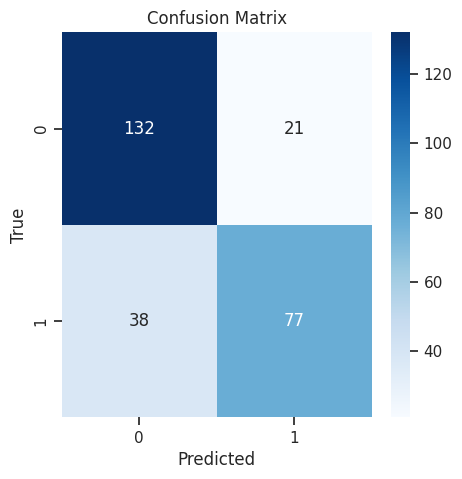

In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.predict(X_train_model5) # prob of successes (survival)
np.round(model.predict(X_train_model5),0) # 1 and 0 (survival or not)
y_train_model5 # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
y_pred = np.round(model.predict(X_test_model5),0)

# Accuracy score
accuracy = accuracy_score(y_test_model5, y_pred)
print('Accuracy:', accuracy)

# Confusion matrix
cm = confusion_matrix(y_test_model5, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
cr = classification_report(y_test_model5, y_pred)
print('Classification Report:')
print(cr)

# Plotting confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Comparision of Accuracy on Test Set for Different Models

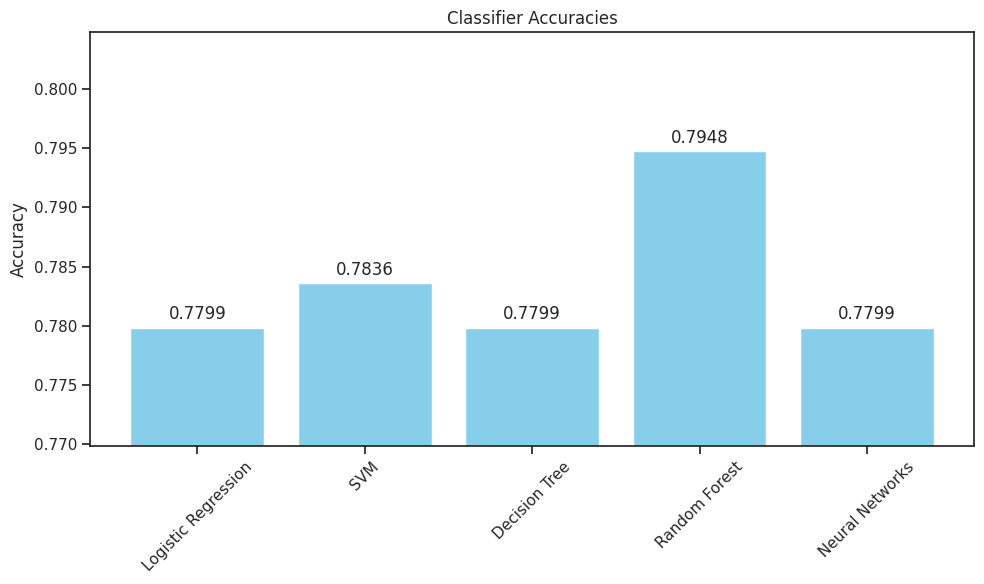

In [382]:
import matplotlib.pyplot as plt

# Data
accuracy_list = [0.77985, 0.78358, 0.77985, 0.79477, 0.77985]
classifier_list = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "Neural Networks"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
bars = ax.bar(classifier_list, accuracy_list, color='skyblue')

# Set axis labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Accuracies')
plt.xticks(rotation=45)

# Set y-axis limits to magnify the scale
ax.set_ylim(min(accuracy_list) - 0.01, max(accuracy_list) + 0.01)

# Function to label bars with their respective values
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

# Show plot
plt.tight_layout()
plt.show()



## Conclusions and Observations
From the bar-plot of classifier accuracies, we can make several observations:

1. **Random Forest Classifier Performs Best**: The Random Forest classifier achieved the highest accuracy among all classifiers, with an accuracy of approximately 0.79477.

2. **SVM and Neural Networks Perform Similarly**: Both the Support Vector Machine (SVM) and Neural Networks classifiers have similar accuracies, with SVM slightly outperforming Neural Networks by a small margin. But, the Neural Networks Algorithm took up a lot of time and even the cross validation procedure was quite complicated. So, SVM has an upperhand over Neural Neworks in this dataset.

3. **Logistic Regression and Decision Tree Perform Similarly**: The Logistic Regression and Decision Tree classifiers have almost identical accuracies, both around 0.77985.

4. **Accuracy Differences are Noticeable**: By magnifying the scale on the y-axis, we can clearly see the differences in accuracies between the classifiers. Even though some classifiers have similar accuracies, the differences are discernible, indicating variations in their performance.

5. **Choice of Classifier Matters**: The choice of classifier significantly influences the accuracy of the classification task. In this case, Random Forest performed the best, highlighting the importance of selecting an appropriate algorithm for the given dataset and task.

Overall, the histogram provides a visual representation of the performance of different classifiers, allowing us to compare their accuracies effectively.

### Some Key Observations from EDA
From the exploratory data analysis (EDA) conducted on the Titanic dataset, several conclusions can be drawn:

1. **Survival Rate**: The survival rate among Titanic passengers was approximately 38%, indicating that a majority of passengers did not survive the sinking.

2. **Passenger Demographics**: The dataset contains information about passengers' demographics, including their age, sex, and passenger class (Pclass). Most passengers were in the third class, followed by the first and second classes.

3. **Age Distribution**: The age distribution of passengers shows that a significant portion of passengers were young adults, with a peak in the age group of 20-30 years. There were also a notable number of children and elderly passengers onboard.

4. **Sex Distribution**: The dataset contains a slightly higher number of male passengers compared to female passengers. However, the survival rate among female passengers was significantly higher than among male passengers, suggesting a potential "women and children first" protocol during the evacuation.

5. **Pclass vs. Survival**: Passengers in the first class had a higher chance of survival compared to those in the second and third classes. This may be attributed to factors such as proximity to lifeboats and priority during evacuation.

6. **Fare Distribution**: The fare distribution correlates with passenger class, with first-class tickets being the most expensive and third-class tickets being the cheapest.

7. **Family Size**: The dataset allows for the calculation of family size based on the number of siblings/spouses and parents/children aboard. Passengers traveling alone (without family members) constituted a significant portion of the dataset.

8. **Embarked Port**: Most passengers embarked from Southampton, followed by Cherbourg and Queenstown. The survival rates varied slightly among passengers embarking from different ports.

Thus, the EDA provides valuable insights into the demographics of Titanic passengers and factors influencing their survival, such as passenger class, age, sex, and family size. These insights can inform further analysis and modeling to predict passenger survival accurately.

## References

Jamesleslie. (2018, November 22). Titanic: Neural network for beginners. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/jamesleslie/titanic-neural-network-for-beginners

Nn_keras_hyperparameter_tuning. (n.d.). GitHub Pages. https://ethen8181.github.io/machine-learning/keras/nn_keras_hyperparameter_tuning.html

Stoltz, G. (2024, April 15). An Introduction to Machine Learning [PDF].

Titanic - Machine learning from disaster | Kaggle. (n.d.). Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/c/titanic/data

Chuang, L. (2020, October 1). Build a neural network in Python (Binary classification). Medium. https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf

Use Keras Deep Learning Models with Scikit-Learn in Python. (n.d.). machinelearningmastery.com. https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/